In [ ]:
!nvidia-smi

In [1]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2200.138
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa
bogomips	: 4400.27
clflush size	: 64
cache_alignment	: 64
address sizes	: 46 bits physical, 48 b

In [2]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, Sequential

tf.random.set_seed(5252)
np.random.seed(403)

path = '/content/gdrive/My Drive/Dacon/Jeju/'
path_data = '201901-202003.csv'
path_submission = 'submission.csv'

In [7]:
def read_data_to_dataframe(path):
    return pd.read_csv(path)

def generate_month_list():
  return [int('20190' + str(month)) for month in range(1, 10)] + [int('2019' + str(month)) for month in range(10,13)] + [int('20200' + str(month)) for month in range(1, 5)]

def separation_by_month(raw):
    months = generate_month_list()
    monthly_df_hash = {}

    for month in months:
        monthly_df_hash[month] = raw[raw['REG_YYMM'] == month].dropna()
        
    return monthly_df_hash


def check_if_submission_set_uniform(submission):
    locations = submission['CARD_SIDO_NM'].unique()
    categories = []
    
    for location in locations:
        if categories:
            if len(categories[0])==len(list(submission[(submission['REG_YYMM'] == 202004) & (submission['CARD_SIDO_NM']==location)].dropna()['STD_CLSS_NM'])):
                pass
            else:
                categories.append(sorted(list(submission[(submission['REG_YYMM'] == 202004) & (submission['CARD_SIDO_NM']==location)].dropna()['STD_CLSS_NM'])))
        else:
            categories.append(sorted(list(submission[(submission['REG_YYMM'] == 202004) & (submission['CARD_SIDO_NM']==location)].dropna()['STD_CLSS_NM'])))
            
    if len(categories)==1:
        print('submission set is uniform')
        return True, categories[0], locations
    else:
        print('submission set is not uniform')
        return False, None, None


def monthly_spent_by_CARD_SID(category, locations, monthly_df_hash):
    months = generate_month_list()
    monthly_spent_hash = {}

    for month in months:
        print('calculating total spent at month',month)
        month_total = pd.DataFrame(columns=['REG_YYMM','CARD_SIDO_NM','STD_CLSS_NM','AMT'])
        month_df = monthly_df_hash[month]
        idx = 0
        for location in locations:
            for item in category:
                temp=month_df[ (month_df['CARD_SIDO_NM']==location) & (month_df['STD_CLSS_NM']==item) ].dropna()
                month_total.loc[idx] = [month, location, item, temp['AMT'].sum()]
                idx += 1
        print('calculated for the month',month)
        monthly_spent_hash[month] = month_total
    
    return monthly_spent_hash

In [ ]:
if __name__ == '__main__':
  raw_path = path + path_data
  submission_path = path + path_submission

  is_uniform, category, locations = check_if_submission_set_uniform(submission = read_data_to_dataframe(submission_path))

  if is_uniform:
      monthly_df_hash = separation_by_month(raw = read_data_to_dataframe(raw_path))
      print("monthly_df_hash[202003].head :\n",monthly_df_hash[202003].head())
      
      #monthly_spent_hash = monthly_spent_by_CARD_SID(category, locations, monthly_df_hash) 다시 실행하지 말것. 
      '''print("monthly_spent_hash[202003] :\n",monthly_spent_hash[202003].head())
      print('data prepared, going to save all monthly_spent_hash to csv files')
      for month in generate_month_list():
          df_to_save = monthly_spent_hash[month]
          df_to_save.to_csv(path + str(month) + '.csv')
          print(month,'.csv  has been saved.')'''


submission set is uniform
monthly_df_hash[202003].head :
           REG_YYMM CARD_SIDO_NM CARD_CCG_NM  ... CSTMR_CNT      AMT CNT
23437284    202003           강원         강릉시  ...         6  2529000   6
23437285    202003           강원         강릉시  ...        10  1133650   9
23437286    202003           강원         강릉시  ...         3   570800   3
23437287    202003           강원         강릉시  ...        25  4192828  25
23437288    202003           강원         강릉시  ...        21  3358900  24

[5 rows x 12 columns]


In [ ]:
# ㅅㅂ 저장을 잘못함... 반 쪼개서 다시 저장하자.
'''def recall_monthly_spent_hash():
    months = generate_month_list()
    monthly_spent_hash = {}
    print('start to recall monthly_spent_hash')
    for month in months:
        monthly_spent_hash[month] = pd.read_csv(path + str(month) + '.csv')
    return monthly_spent_hash


def monthly_data_correction():
    monthly_spent_hash = recall_monthly_spent_hash()
    months = generate_month_list()
    data_re = pd.DataFrame(columns=['REG_YYMM', 'CARD_SIDO_NM', 'STD_CLSS_NM', 'AMT'])
    for month in months:
        data = monthly_spent_hash[month]
        for i in range(len(data)//2):
            idx = 2 * i
            data_re.loc[i] = [data.loc[idx, 'REG_YYMM'], data.loc[idx, 'CARD_SIDO_NM'], data.loc[idx, 'STD_CLSS_NM'], data.loc[idx, 'AMT']]
        data_re.to_csv(path + str(month) + '.csv')
        print('data_re for month',month,'has been saved')

monthly_data_correction()'''

start to recall monthly_spent_hash
data_re for month 201901 has been saved
data_re for month 201902 has been saved
data_re for month 201903 has been saved
data_re for month 201904 has been saved
data_re for month 201905 has been saved
data_re for month 201906 has been saved
data_re for month 201907 has been saved
data_re for month 201908 has been saved
data_re for month 201909 has been saved
data_re for month 201910 has been saved
data_re for month 201911 has been saved
data_re for month 201912 has been saved
data_re for month 202001 has been saved
data_re for month 202002 has been saved
data_re for month 202003 has been saved


잘 저장된 것을 확인함.

시간이 지나면서 소비의 지역비율, 소비의 항목비율을 볼 것임.

In [8]:
def recall_monthly_spent_hash():
    months = generate_month_list()
    monthly_spent_hash = {}
    print('start to recall monthly_spent_hash')
    for month in months:
        monthly_spent_hash[month] = pd.read_csv(path + str(month) + '.csv')
    return monthly_spent_hash

def month_XcolumnX_spent_figure(month_spent, column):
    plt.rcParams['figure.figsize'] = [15, 10]
    locations = list(month_spent[column].unique())
    groups = [i for i in range(len(locations))]
    spent = []
    for location in locations:
        spent.append(month_spent[month_spent[column] == location].dropna()['AMT'].sum())

    sorting = sorted([(s,g) for s,g in zip(spent,groups)],reverse = True)
    spent = [elt[0] for elt in sorting]

    group_location_map = {i : locations[elt[1]] for i, elt in enumerate(sorting)}
    
    groups = [i for i in range(len(locations))]
    plt.pie(spent, labels = groups, autopct = '%1.2f%%', startangle = 90, textprops = {'fontsize' : 8})
    plt.axis('equal')
    title = str(month_spent.loc[0,'REG_YYMM']) + 'spent rates by ' + column
    plt.title(title, fontsize = 20)
    plt.show()
    print(group_location_map)

def XcolumnX_spent_rate_df(monthly_spent_hash, column):
    months = generate_month_list()
    spent_rates_df = pd.DataFrame(columns = months)

    for month in months:
        month_spent = monthly_spent_hash[month]
        locations = list(month_spent[column].unique())
        spent = []
        for location in locations:
            spent.append(month_spent[month_spent[column] == location].dropna()['AMT'].sum())
        denom = sum(spent)/100
        spent_rates = [s/denom for s in spent]
        spent_rates_df[month] = pd.Series(spent_rates, index = locations)

    return spent_rates_df

def spent_rates_graph(spent_rates_df):
    plt.rcParams['figure.figsize'] = [20, 10]
    months = generate_month_list()
    x = [str(m) for m in months]
    plt.title('spent_rates_change')
    plt.xlabel('month')
    plt.ylabel('percentage')
    for i in range(len(spent_rates_df)):
        plt.plot(x,spent_rates_df.iloc[i,:],'--')
    plt.show()

def spent_rates_mean(spent_rates_df):
    temp =  spent_rates_df.mean(axis = 1)
    tuples = [(temp[temp.index[i]],temp.index[i]) for i in range(len(temp))]
    print(sorted(tuples, reverse = True))
    return spent_rates_df.mean(axis = 1)
  

start to recall monthly_spent_hash


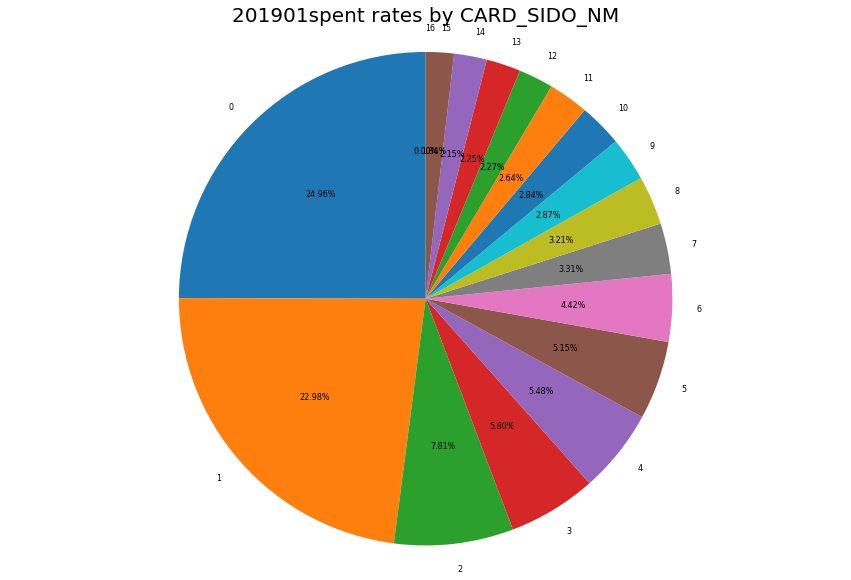

{0: '서울', 1: '경기', 2: '부산', 3: '경남', 4: '인천', 5: '대구', 6: '경북', 7: '충남', 8: '전북', 9: '전남', 10: '광주', 11: '강원', 12: '제주', 13: '충북', 14: '울산', 15: '대전', 16: '세종'}


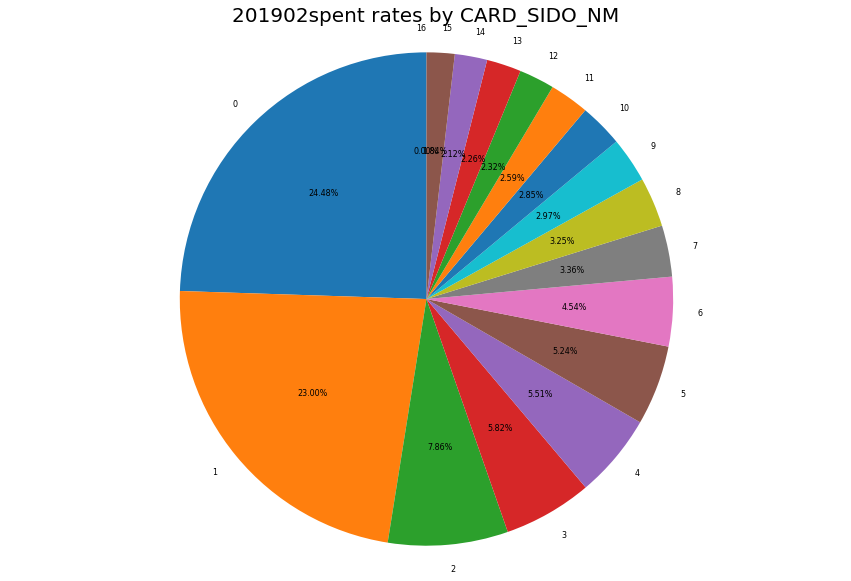

{0: '서울', 1: '경기', 2: '부산', 3: '경남', 4: '인천', 5: '대구', 6: '경북', 7: '충남', 8: '전북', 9: '전남', 10: '광주', 11: '강원', 12: '충북', 13: '제주', 14: '울산', 15: '대전', 16: '세종'}


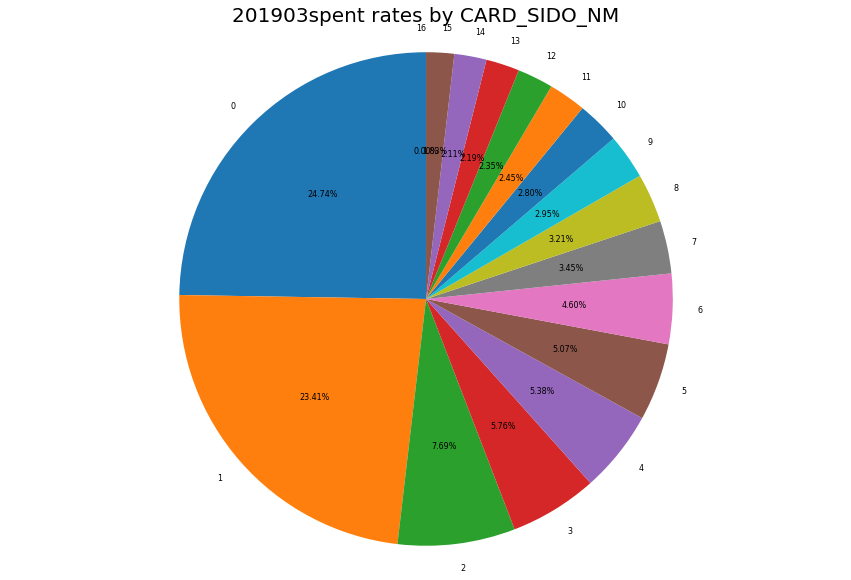

{0: '서울', 1: '경기', 2: '부산', 3: '경남', 4: '인천', 5: '대구', 6: '경북', 7: '충남', 8: '전북', 9: '전남', 10: '광주', 11: '강원', 12: '충북', 13: '제주', 14: '울산', 15: '대전', 16: '세종'}


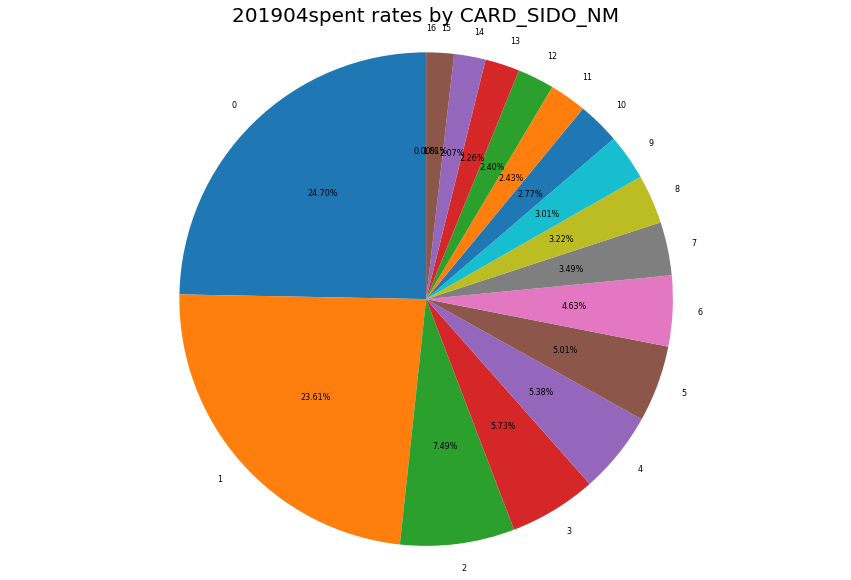

{0: '서울', 1: '경기', 2: '부산', 3: '경남', 4: '인천', 5: '대구', 6: '경북', 7: '충남', 8: '전북', 9: '전남', 10: '광주', 11: '강원', 12: '충북', 13: '제주', 14: '울산', 15: '대전', 16: '세종'}


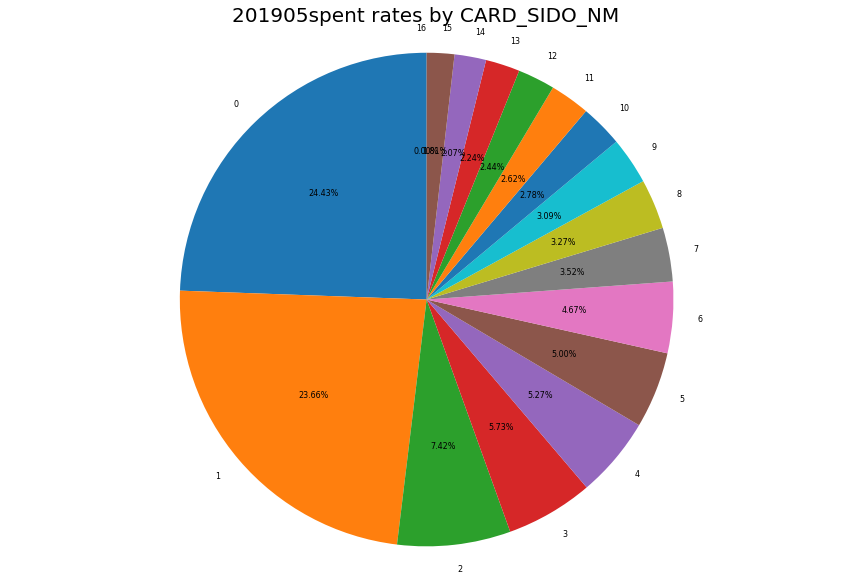

{0: '서울', 1: '경기', 2: '부산', 3: '경남', 4: '인천', 5: '대구', 6: '경북', 7: '충남', 8: '전북', 9: '전남', 10: '광주', 11: '강원', 12: '충북', 13: '제주', 14: '울산', 15: '대전', 16: '세종'}


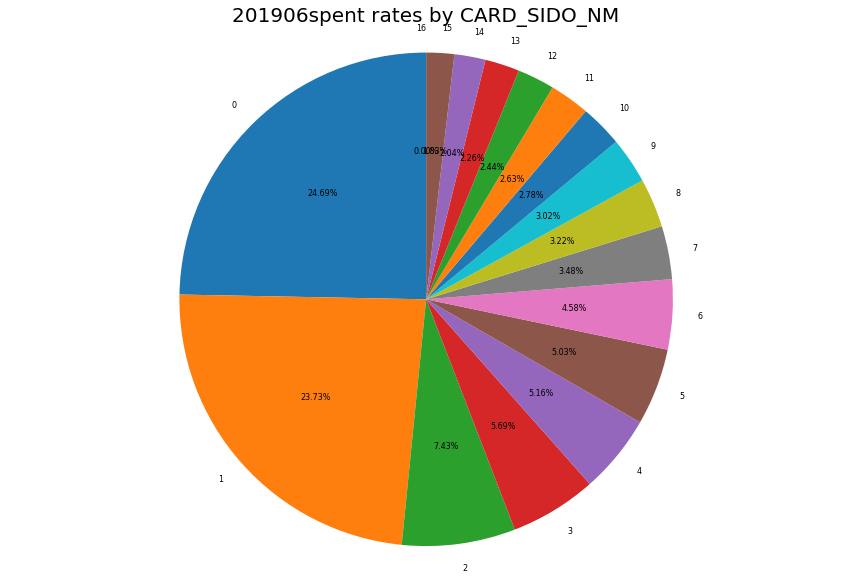

{0: '서울', 1: '경기', 2: '부산', 3: '경남', 4: '인천', 5: '대구', 6: '경북', 7: '충남', 8: '전북', 9: '전남', 10: '광주', 11: '강원', 12: '충북', 13: '제주', 14: '울산', 15: '대전', 16: '세종'}


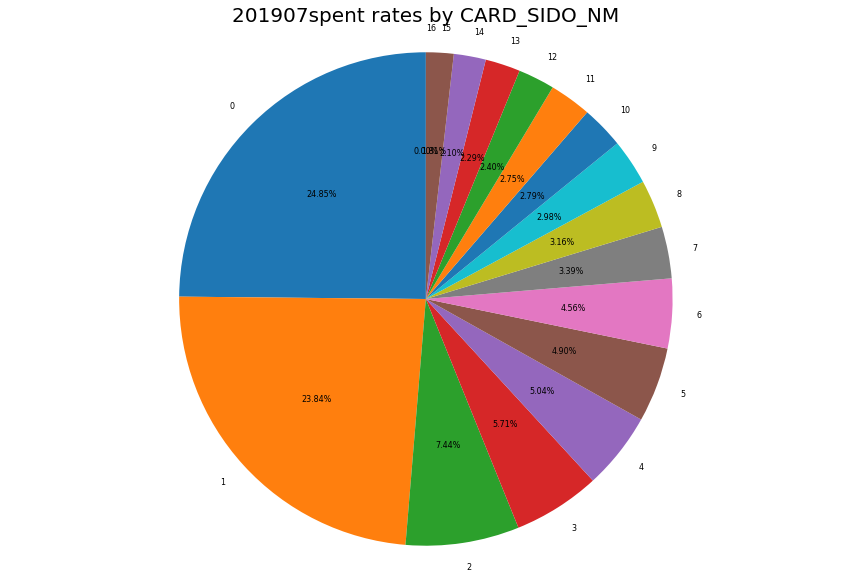

{0: '서울', 1: '경기', 2: '부산', 3: '경남', 4: '대구', 5: '인천', 6: '경북', 7: '충남', 8: '전북', 9: '전남', 10: '광주', 11: '강원', 12: '충북', 13: '제주', 14: '울산', 15: '대전', 16: '세종'}


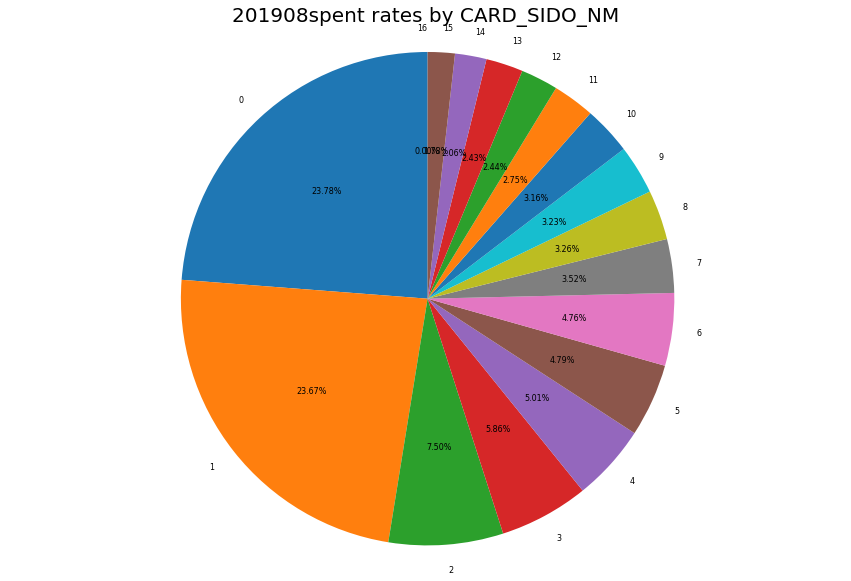

{0: '서울', 1: '경기', 2: '부산', 3: '경남', 4: '대구', 5: '인천', 6: '경북', 7: '충남', 8: '강원', 9: '전북', 10: '전남', 11: '광주', 12: '충북', 13: '제주', 14: '울산', 15: '대전', 16: '세종'}


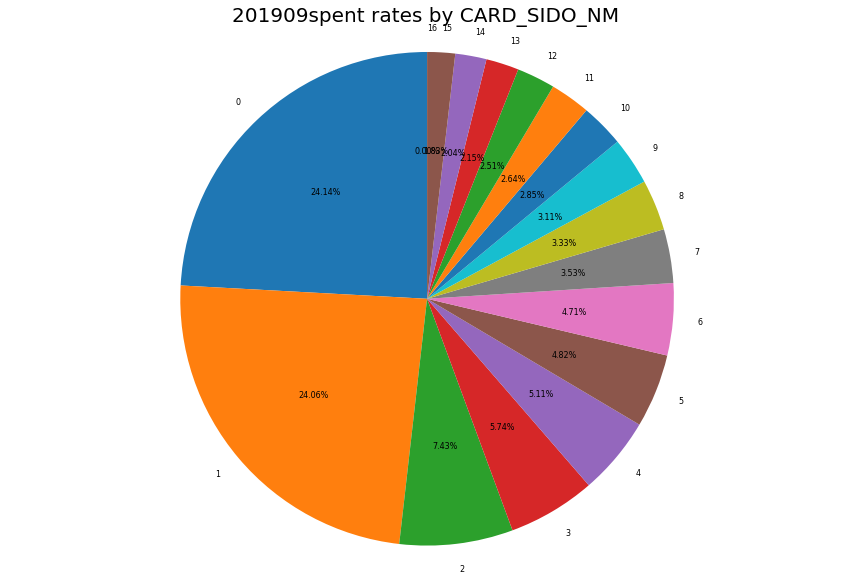

{0: '서울', 1: '경기', 2: '부산', 3: '경남', 4: '대구', 5: '인천', 6: '경북', 7: '충남', 8: '전북', 9: '전남', 10: '광주', 11: '강원', 12: '충북', 13: '제주', 14: '울산', 15: '대전', 16: '세종'}


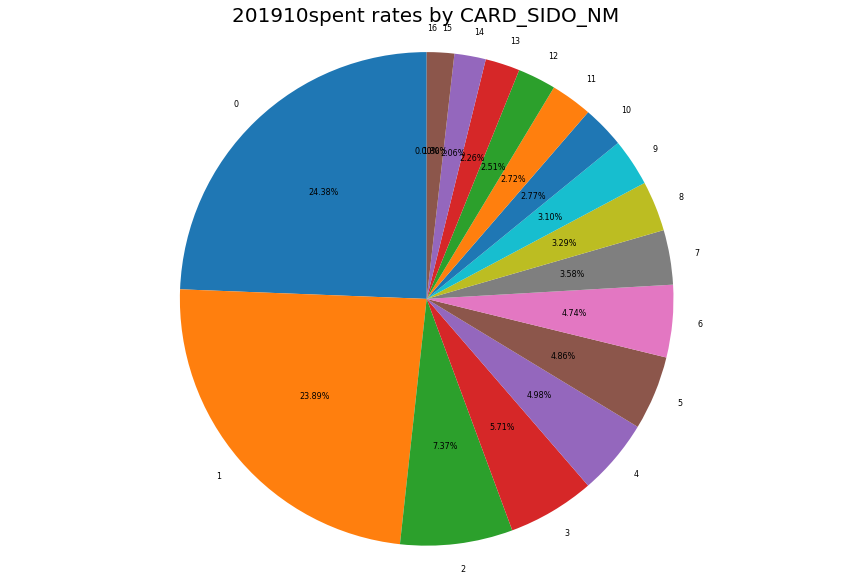

{0: '서울', 1: '경기', 2: '부산', 3: '경남', 4: '대구', 5: '인천', 6: '경북', 7: '충남', 8: '전북', 9: '전남', 10: '광주', 11: '강원', 12: '충북', 13: '제주', 14: '울산', 15: '대전', 16: '세종'}


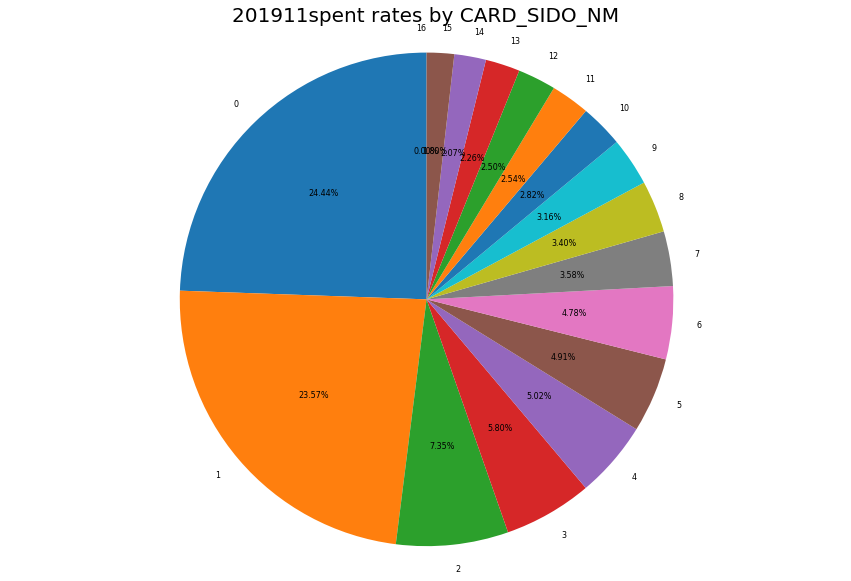

{0: '서울', 1: '경기', 2: '부산', 3: '경남', 4: '대구', 5: '인천', 6: '경북', 7: '충남', 8: '전북', 9: '전남', 10: '광주', 11: '강원', 12: '충북', 13: '제주', 14: '울산', 15: '대전', 16: '세종'}


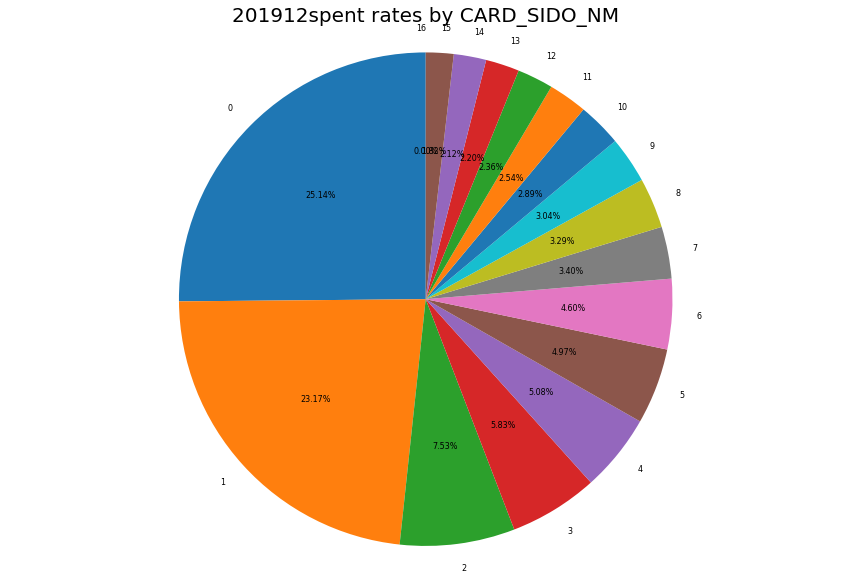

{0: '서울', 1: '경기', 2: '부산', 3: '경남', 4: '대구', 5: '인천', 6: '경북', 7: '충남', 8: '전북', 9: '전남', 10: '광주', 11: '강원', 12: '충북', 13: '제주', 14: '울산', 15: '대전', 16: '세종'}


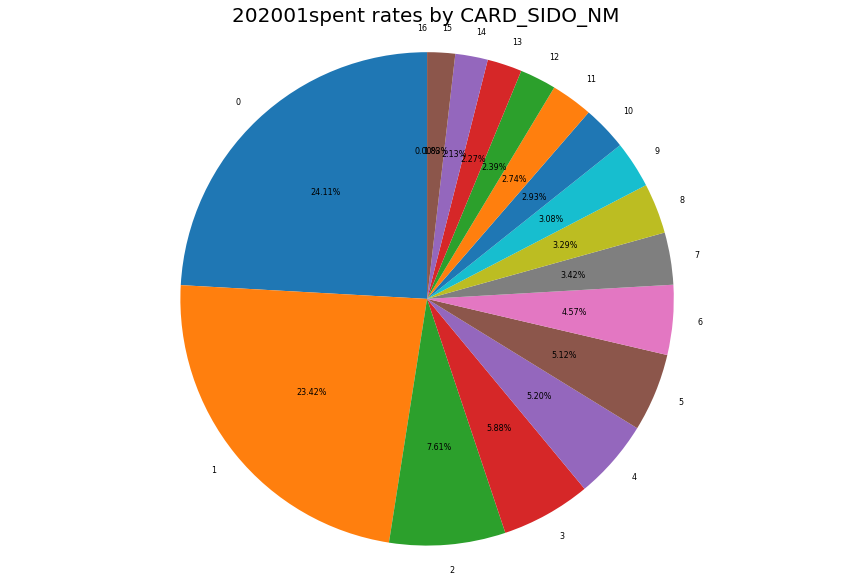

{0: '서울', 1: '경기', 2: '부산', 3: '경남', 4: '대구', 5: '인천', 6: '경북', 7: '충남', 8: '전북', 9: '전남', 10: '광주', 11: '강원', 12: '충북', 13: '제주', 14: '울산', 15: '대전', 16: '세종'}


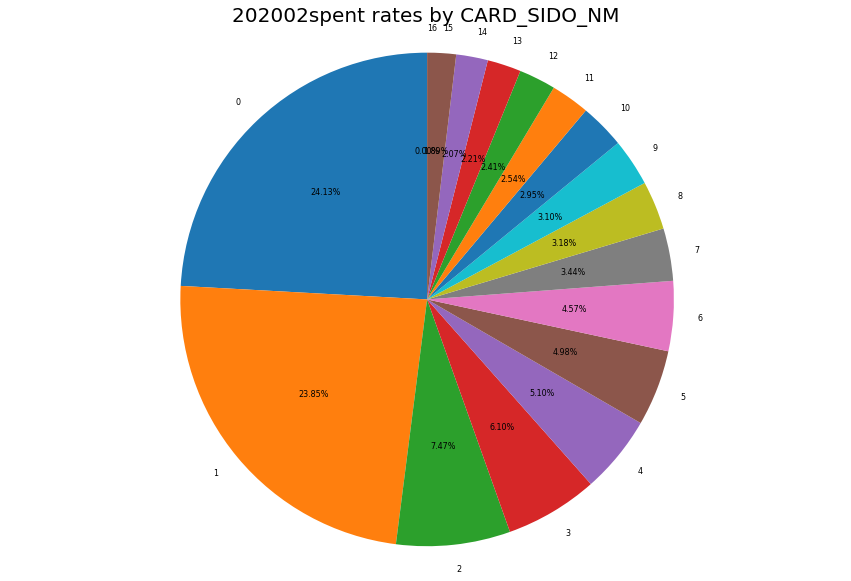

{0: '서울', 1: '경기', 2: '부산', 3: '경남', 4: '대구', 5: '인천', 6: '경북', 7: '충남', 8: '전북', 9: '전남', 10: '광주', 11: '강원', 12: '충북', 13: '울산', 14: '제주', 15: '대전', 16: '세종'}


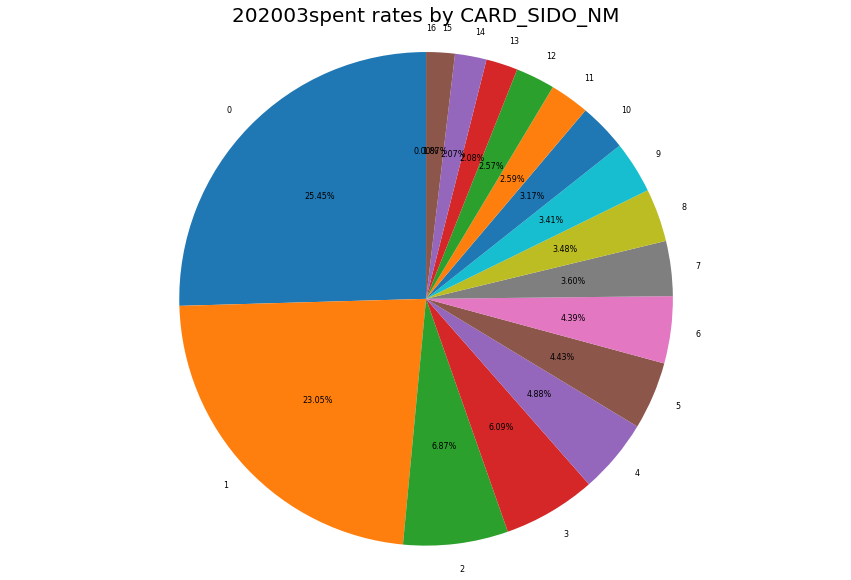

{0: '경기', 1: '서울', 2: '부산', 3: '경남', 4: '인천', 5: '대구', 6: '경북', 7: '충남', 8: '전북', 9: '전남', 10: '광주', 11: '충북', 12: '강원', 13: '제주', 14: '울산', 15: '대전', 16: '세종'}


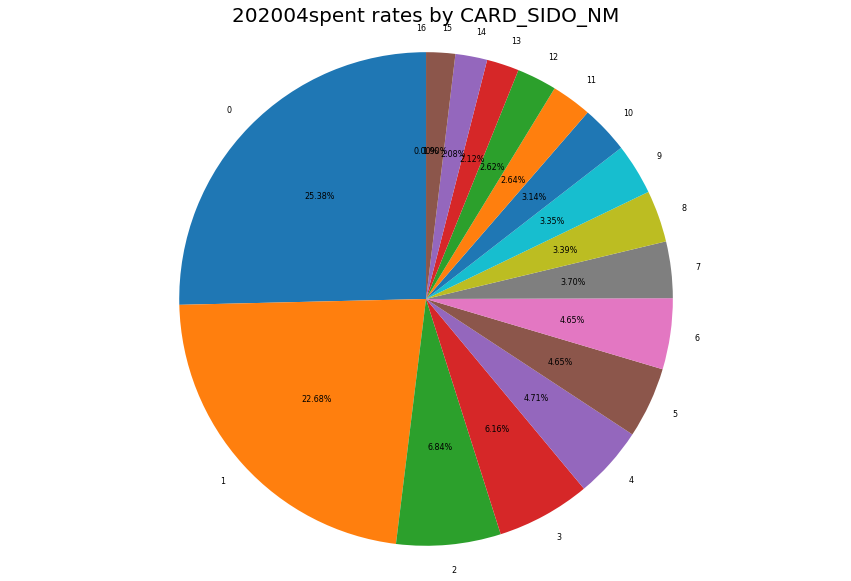

{0: '경기', 1: '서울', 2: '부산', 3: '경남', 4: '인천', 5: '경북', 6: '대구', 7: '충남', 8: '전북', 9: '전남', 10: '광주', 11: '강원', 12: '충북', 13: '울산', 14: '제주', 15: '대전', 16: '세종'}
       201901     201902     201903  ...     202002     202003     202004
강원   2.641354   2.587898   2.450999  ...   2.538752   2.573833   2.642223
경기  22.981346  23.003621  23.406167  ...  23.853881  25.453970  25.378069
경남   5.803373   5.818475   5.759144  ...   6.096591   6.094777   6.156174
경북   4.424485   4.543360   4.604230  ...   4.574258   4.389229   4.649385
광주   2.838902   2.846645   2.804894  ...   2.951190   3.165412   3.144275
대구   5.146973   5.236511   5.070193  ...   5.100567   4.434354   4.647957
대전   1.841018   1.835640   1.833793  ...   1.885265   1.873096   1.902565
부산   7.809301   7.861978   7.694259  ...   7.469972   6.868336   6.837985
서울  24.962878  24.481658  24.744426  ...  24.127080  23.053031  22.676571
세종   0.000000   0.000000   0.000000  ...   0.000000   0.000000   0.000000
울산   2.148695   2.121111 

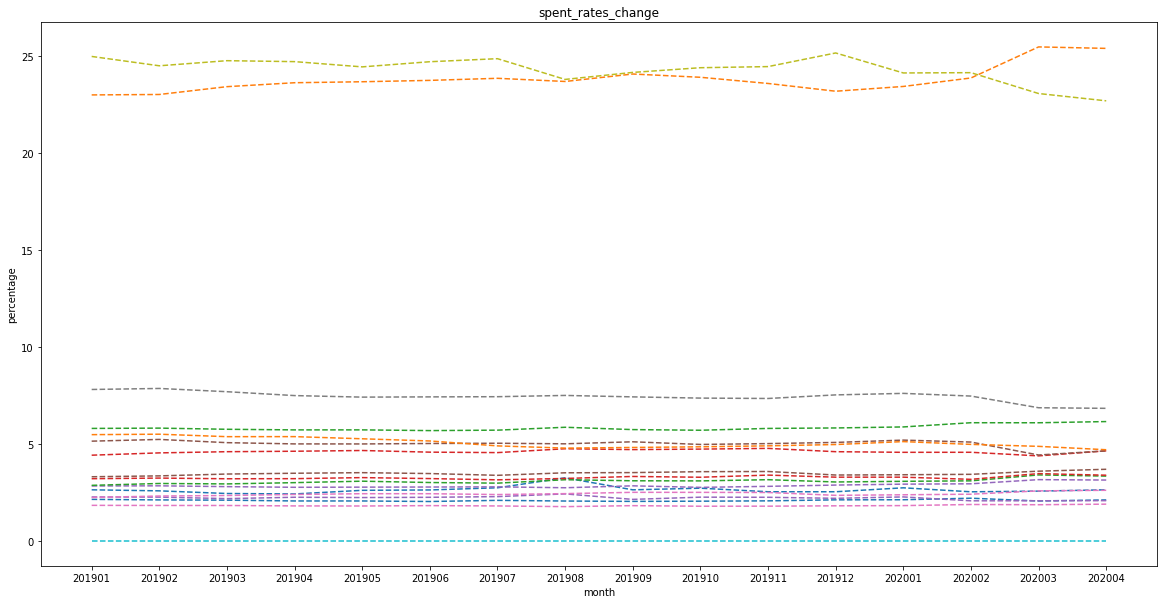

[(24.293888387149824, '서울'), (23.793301889020352, '경기'), (7.443546659809971, '부산'), (5.838495852682703, '경남'), (5.069723921272117, '인천'), (5.007530783677053, '대구'), (4.611015687573614, '경북'), (3.4860634659662253, '충남'), (3.2755599477864177, '전북'), (3.087155113169563, '전남'), (2.8673837986101995, '광주'), (2.644377678185548, '강원'), (2.4328916552058115, '충북'), (2.2238812664731196, '제주'), (2.095919158672588, '울산'), (1.8292647347448925, '대전'), (0.0, '세종')]
강원     2.644378
경기    23.793302
경남     5.838496
경북     4.611016
광주     2.867384
대구     5.007531
대전     1.829265
부산     7.443547
서울    24.293888
세종     0.000000
울산     2.095919
인천     5.069724
전남     3.087155
전북     3.275560
제주     2.223881
충남     3.486063
충북     2.432892
dtype: float64


In [9]:
if __name__ == '__main__':
    monthly_spent_hash = recall_monthly_spent_hash()
    months = generate_month_list()
    for month in months:
        month_XcolumnX_spent_figure(month_spent = monthly_spent_hash[month], column = 'CARD_SIDO_NM')
    spent_rates_df = XcolumnX_spent_rate_df(monthly_spent_hash, column = 'CARD_SIDO_NM')
    print(spent_rates_df)
    spent_rates_graph(spent_rates_df)
    location_spent_rates_mean = spent_rates_mean(spent_rates_df)
    print(location_spent_rates_mean)

start to recall monthly_spent_hash


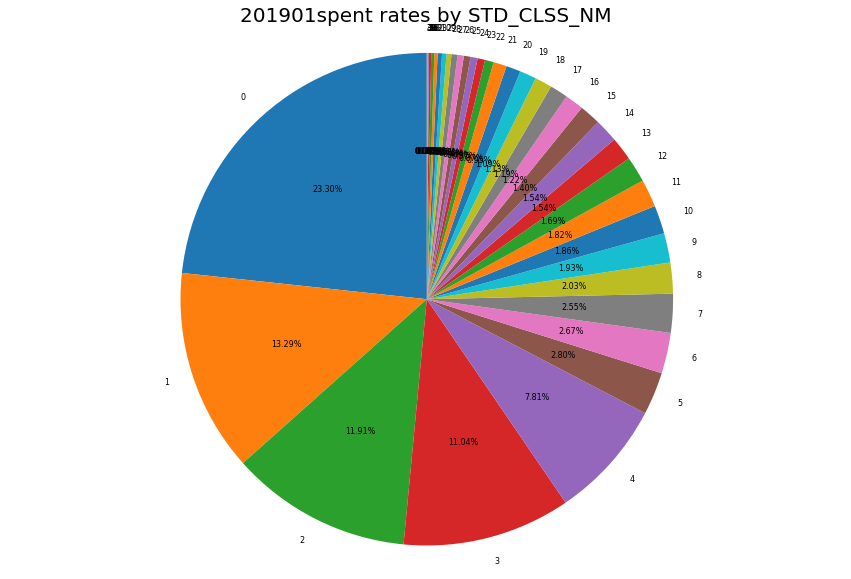

{0: '한식 음식점업', 1: '기타 대형 종합 소매업', 2: '차량용 주유소 운영업', 3: '슈퍼마켓', 4: '체인화 편의점', 5: '서양식 음식점업', 6: '택시 운송업', 7: '기타음식료품위주종합소매업', 8: '육류 소매업', 9: '스포츠 및 레크레이션 용품 임대업', 10: '피자 햄버거 샌드위치 및 유사 음식점업', 11: '그외 기타 종합 소매업', 12: '비알콜 음료점업', 13: '중식 음식점업', 14: '빵 및 과자류 소매업', 15: '일식 음식점업', 16: '화장품 및 방향제 소매업', 17: '정기 항공 운송업', 18: '기타 외국식 음식점업', 19: '과실 및 채소 소매업', 20: '일반유흥 주점업', 21: '면세점', 22: '수산물 소매업', 23: '호텔업', 24: '여관업', 25: '욕탕업', 26: '차량용 가스 충전업', 27: '버스 운송업', 28: '여행사업', 29: '골프장 운영업', 30: '기타 주점업', 31: '건강보조식품 소매업', 32: '휴양콘도 운영업', 33: '전시 및 행사 대행업', 34: '내항 여객 운송업', 35: '마사지업', 36: '자동차 임대업', 37: '관광 민예품 및 선물용품 소매업', 38: '그외 기타 스포츠시설 운영업', 39: '기타 수상오락 서비스업', 40: '그외 기타 분류안된 오락관련 서비스업'}


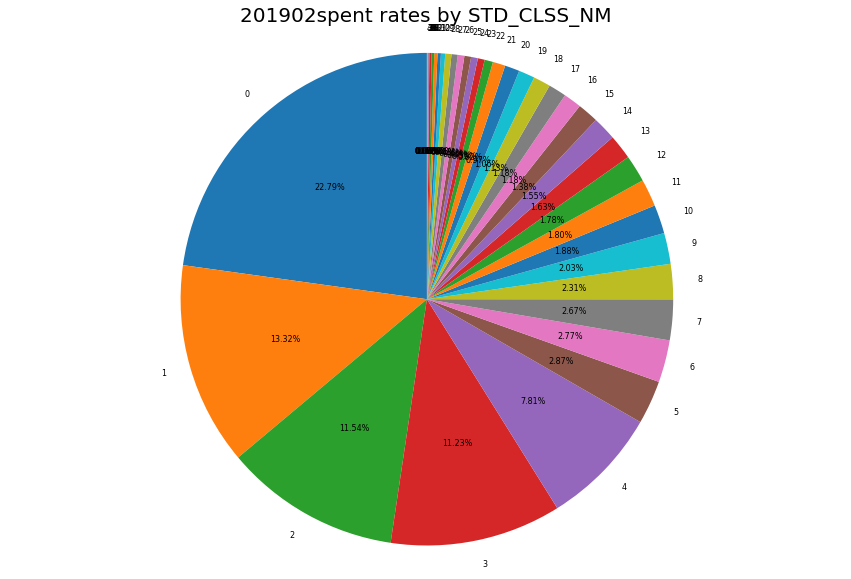

{0: '한식 음식점업', 1: '기타 대형 종합 소매업', 2: '차량용 주유소 운영업', 3: '슈퍼마켓', 4: '체인화 편의점', 5: '서양식 음식점업', 6: '택시 운송업', 7: '기타음식료품위주종합소매업', 8: '육류 소매업', 9: '스포츠 및 레크레이션 용품 임대업', 10: '피자 햄버거 샌드위치 및 유사 음식점업', 11: '그외 기타 종합 소매업', 12: '비알콜 음료점업', 13: '중식 음식점업', 14: '빵 및 과자류 소매업', 15: '일식 음식점업', 16: '정기 항공 운송업', 17: '화장품 및 방향제 소매업', 18: '과실 및 채소 소매업', 19: '기타 외국식 음식점업', 20: '일반유흥 주점업', 21: '면세점', 22: '수산물 소매업', 23: '여관업', 24: '골프장 운영업', 25: '욕탕업', 26: '호텔업', 27: '차량용 가스 충전업', 28: '버스 운송업', 29: '기타 주점업', 30: '여행사업', 31: '건강보조식품 소매업', 32: '휴양콘도 운영업', 33: '전시 및 행사 대행업', 34: '내항 여객 운송업', 35: '자동차 임대업', 36: '마사지업', 37: '관광 민예품 및 선물용품 소매업', 38: '그외 기타 스포츠시설 운영업', 39: '기타 수상오락 서비스업', 40: '그외 기타 분류안된 오락관련 서비스업'}


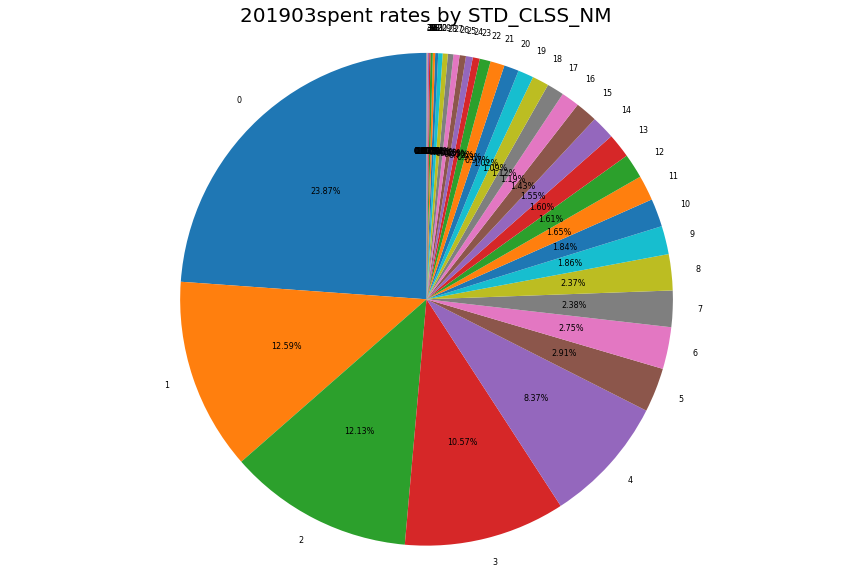

{0: '한식 음식점업', 1: '기타 대형 종합 소매업', 2: '차량용 주유소 운영업', 3: '슈퍼마켓', 4: '체인화 편의점', 5: '서양식 음식점업', 6: '택시 운송업', 7: '기타음식료품위주종합소매업', 8: '스포츠 및 레크레이션 용품 임대업', 9: '비알콜 음료점업', 10: '피자 햄버거 샌드위치 및 유사 음식점업', 11: '중식 음식점업', 12: '빵 및 과자류 소매업', 13: '육류 소매업', 14: '그외 기타 종합 소매업', 15: '일식 음식점업', 16: '화장품 및 방향제 소매업', 17: '기타 외국식 음식점업', 18: '정기 항공 운송업', 19: '골프장 운영업', 20: '일반유흥 주점업', 21: '과실 및 채소 소매업', 22: '면세점', 23: '수산물 소매업', 24: '여관업', 25: '버스 운송업', 26: '차량용 가스 충전업', 27: '욕탕업', 28: '호텔업', 29: '기타 주점업', 30: '여행사업', 31: '건강보조식품 소매업', 32: '전시 및 행사 대행업', 33: '휴양콘도 운영업', 34: '내항 여객 운송업', 35: '마사지업', 36: '자동차 임대업', 37: '관광 민예품 및 선물용품 소매업', 38: '그외 기타 스포츠시설 운영업', 39: '기타 수상오락 서비스업', 40: '그외 기타 분류안된 오락관련 서비스업'}


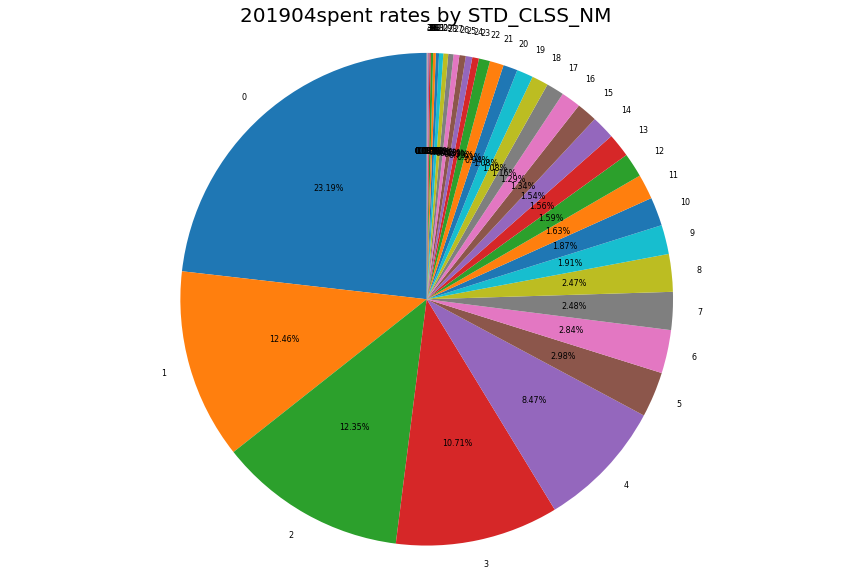

{0: '한식 음식점업', 1: '차량용 주유소 운영업', 2: '기타 대형 종합 소매업', 3: '슈퍼마켓', 4: '체인화 편의점', 5: '택시 운송업', 6: '서양식 음식점업', 7: '기타음식료품위주종합소매업', 8: '스포츠 및 레크레이션 용품 임대업', 9: '비알콜 음료점업', 10: '피자 햄버거 샌드위치 및 유사 음식점업', 11: '육류 소매업', 12: '중식 음식점업', 13: '빵 및 과자류 소매업', 14: '그외 기타 종합 소매업', 15: '일식 음식점업', 16: '골프장 운영업', 17: '화장품 및 방향제 소매업', 18: '기타 외국식 음식점업', 19: '정기 항공 운송업', 20: '과실 및 채소 소매업', 21: '일반유흥 주점업', 22: '면세점', 23: '수산물 소매업', 24: '여관업', 25: '버스 운송업', 26: '차량용 가스 충전업', 27: '호텔업', 28: '욕탕업', 29: '기타 주점업', 30: '여행사업', 31: '전시 및 행사 대행업', 32: '건강보조식품 소매업', 33: '내항 여객 운송업', 34: '휴양콘도 운영업', 35: '자동차 임대업', 36: '마사지업', 37: '관광 민예품 및 선물용품 소매업', 38: '그외 기타 스포츠시설 운영업', 39: '기타 수상오락 서비스업', 40: '그외 기타 분류안된 오락관련 서비스업'}


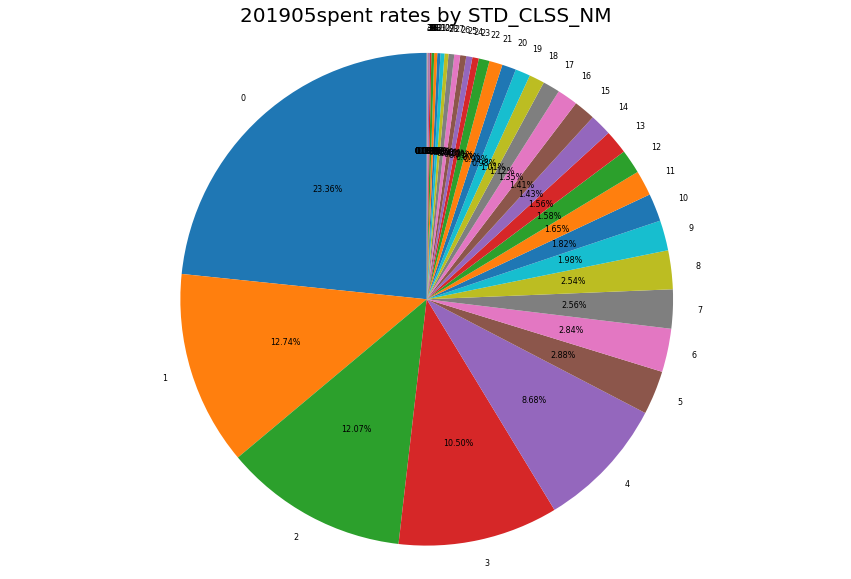

{0: '한식 음식점업', 1: '차량용 주유소 운영업', 2: '기타 대형 종합 소매업', 3: '슈퍼마켓', 4: '체인화 편의점', 5: '서양식 음식점업', 6: '택시 운송업', 7: '스포츠 및 레크레이션 용품 임대업', 8: '기타음식료품위주종합소매업', 9: '비알콜 음료점업', 10: '피자 햄버거 샌드위치 및 유사 음식점업', 11: '육류 소매업', 12: '그외 기타 종합 소매업', 13: '중식 음식점업', 14: '빵 및 과자류 소매업', 15: '골프장 운영업', 16: '일식 음식점업', 17: '화장품 및 방향제 소매업', 18: '기타 외국식 음식점업', 19: '정기 항공 운송업', 20: '과실 및 채소 소매업', 21: '일반유흥 주점업', 22: '면세점', 23: '여관업', 24: '버스 운송업', 25: '수산물 소매업', 26: '차량용 가스 충전업', 27: '호텔업', 28: '기타 주점업', 29: '욕탕업', 30: '전시 및 행사 대행업', 31: '여행사업', 32: '건강보조식품 소매업', 33: '휴양콘도 운영업', 34: '내항 여객 운송업', 35: '자동차 임대업', 36: '마사지업', 37: '관광 민예품 및 선물용품 소매업', 38: '그외 기타 스포츠시설 운영업', 39: '기타 수상오락 서비스업', 40: '그외 기타 분류안된 오락관련 서비스업'}


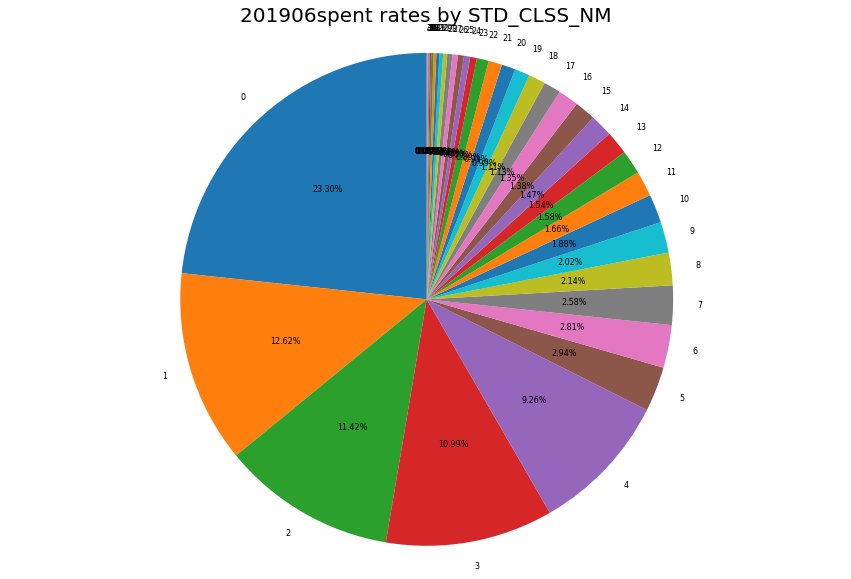

{0: '한식 음식점업', 1: '차량용 주유소 운영업', 2: '기타 대형 종합 소매업', 3: '슈퍼마켓', 4: '체인화 편의점', 5: '서양식 음식점업', 6: '택시 운송업', 7: '기타음식료품위주종합소매업', 8: '스포츠 및 레크레이션 용품 임대업', 9: '비알콜 음료점업', 10: '피자 햄버거 샌드위치 및 유사 음식점업', 11: '육류 소매업', 12: '중식 음식점업', 13: '그외 기타 종합 소매업', 14: '골프장 운영업', 15: '빵 및 과자류 소매업', 16: '일식 음식점업', 17: '정기 항공 운송업', 18: '화장품 및 방향제 소매업', 19: '기타 외국식 음식점업', 20: '과실 및 채소 소매업', 21: '일반유흥 주점업', 22: '면세점', 23: '여관업', 24: '버스 운송업', 25: '차량용 가스 충전업', 26: '수산물 소매업', 27: '호텔업', 28: '기타 주점업', 29: '욕탕업', 30: '전시 및 행사 대행업', 31: '여행사업', 32: '건강보조식품 소매업', 33: '휴양콘도 운영업', 34: '내항 여객 운송업', 35: '자동차 임대업', 36: '마사지업', 37: '관광 민예품 및 선물용품 소매업', 38: '그외 기타 스포츠시설 운영업', 39: '기타 수상오락 서비스업', 40: '그외 기타 분류안된 오락관련 서비스업'}


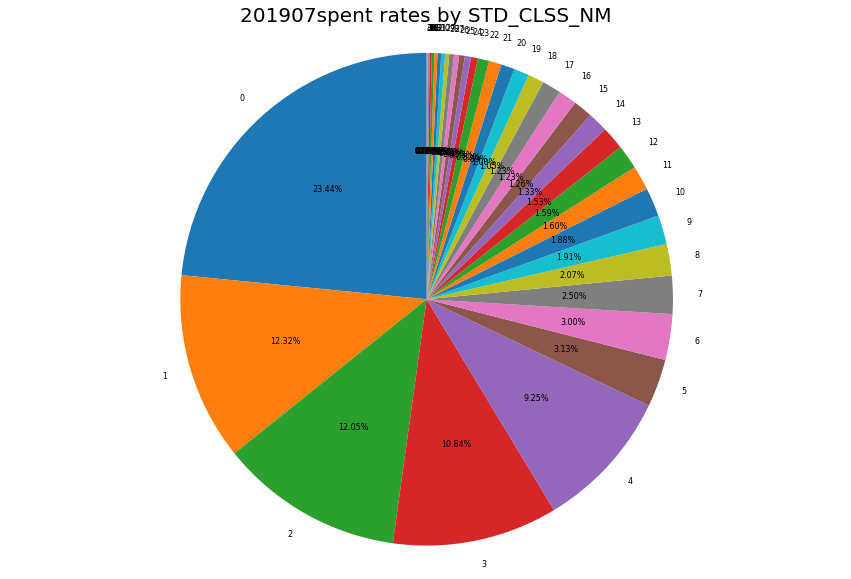

{0: '한식 음식점업', 1: '차량용 주유소 운영업', 2: '기타 대형 종합 소매업', 3: '슈퍼마켓', 4: '체인화 편의점', 5: '택시 운송업', 6: '서양식 음식점업', 7: '기타음식료품위주종합소매업', 8: '비알콜 음료점업', 9: '피자 햄버거 샌드위치 및 유사 음식점업', 10: '스포츠 및 레크레이션 용품 임대업', 11: '중식 음식점업', 12: '육류 소매업', 13: '그외 기타 종합 소매업', 14: '빵 및 과자류 소매업', 15: '정기 항공 운송업', 16: '일식 음식점업', 17: '골프장 운영업', 18: '화장품 및 방향제 소매업', 19: '기타 외국식 음식점업', 20: '일반유흥 주점업', 21: '과실 및 채소 소매업', 22: '면세점', 23: '여관업', 24: '버스 운송업', 25: '차량용 가스 충전업', 26: '호텔업', 27: '수산물 소매업', 28: '기타 주점업', 29: '여행사업', 30: '욕탕업', 31: '전시 및 행사 대행업', 32: '휴양콘도 운영업', 33: '건강보조식품 소매업', 34: '내항 여객 운송업', 35: '자동차 임대업', 36: '마사지업', 37: '관광 민예품 및 선물용품 소매업', 38: '그외 기타 스포츠시설 운영업', 39: '기타 수상오락 서비스업', 40: '그외 기타 분류안된 오락관련 서비스업'}


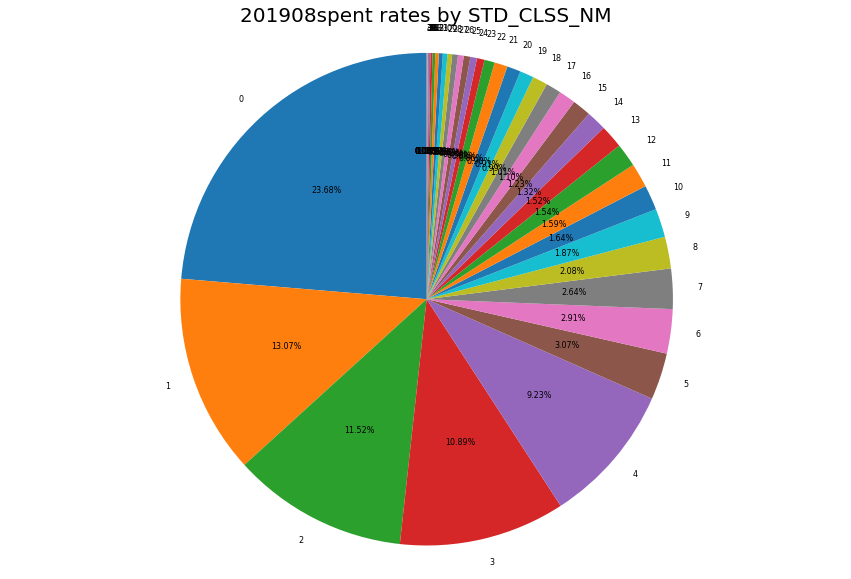

{0: '한식 음식점업', 1: '차량용 주유소 운영업', 2: '기타 대형 종합 소매업', 3: '슈퍼마켓', 4: '체인화 편의점', 5: '서양식 음식점업', 6: '택시 운송업', 7: '기타음식료품위주종합소매업', 8: '비알콜 음료점업', 9: '피자 햄버거 샌드위치 및 유사 음식점업', 10: '육류 소매업', 11: '그외 기타 종합 소매업', 12: '중식 음식점업', 13: '스포츠 및 레크레이션 용품 임대업', 14: '빵 및 과자류 소매업', 15: '일식 음식점업', 16: '골프장 운영업', 17: '화장품 및 방향제 소매업', 18: '기타 외국식 음식점업', 19: '과실 및 채소 소매업', 20: '정기 항공 운송업', 21: '일반유흥 주점업', 22: '면세점', 23: '여관업', 24: '호텔업', 25: '버스 운송업', 26: '수산물 소매업', 27: '차량용 가스 충전업', 28: '휴양콘도 운영업', 29: '전시 및 행사 대행업', 30: '기타 주점업', 31: '욕탕업', 32: '여행사업', 33: '건강보조식품 소매업', 34: '내항 여객 운송업', 35: '자동차 임대업', 36: '마사지업', 37: '관광 민예품 및 선물용품 소매업', 38: '그외 기타 스포츠시설 운영업', 39: '기타 수상오락 서비스업', 40: '그외 기타 분류안된 오락관련 서비스업'}


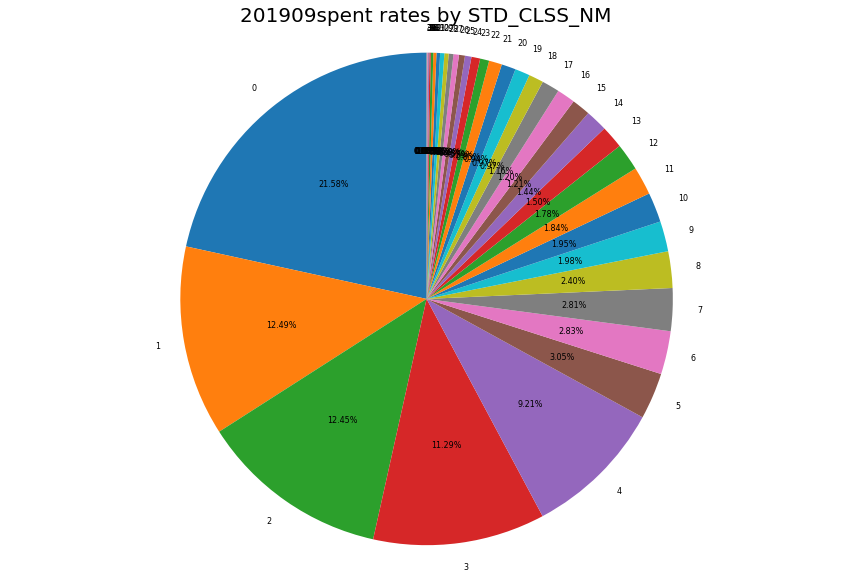

{0: '한식 음식점업', 1: '차량용 주유소 운영업', 2: '기타 대형 종합 소매업', 3: '슈퍼마켓', 4: '체인화 편의점', 5: '택시 운송업', 6: '서양식 음식점업', 7: '기타음식료품위주종합소매업', 8: '육류 소매업', 9: '스포츠 및 레크레이션 용품 임대업', 10: '비알콜 음료점업', 11: '그외 기타 종합 소매업', 12: '피자 햄버거 샌드위치 및 유사 음식점업', 13: '중식 음식점업', 14: '빵 및 과자류 소매업', 15: '일식 음식점업', 16: '과실 및 채소 소매업', 17: '골프장 운영업', 18: '화장품 및 방향제 소매업', 19: '기타 외국식 음식점업', 20: '일반유흥 주점업', 21: '정기 항공 운송업', 22: '면세점', 23: '수산물 소매업', 24: '여관업', 25: '버스 운송업', 26: '차량용 가스 충전업', 27: '호텔업', 28: '기타 주점업', 29: '욕탕업', 30: '건강보조식품 소매업', 31: '전시 및 행사 대행업', 32: '여행사업', 33: '휴양콘도 운영업', 34: '내항 여객 운송업', 35: '자동차 임대업', 36: '마사지업', 37: '관광 민예품 및 선물용품 소매업', 38: '그외 기타 스포츠시설 운영업', 39: '기타 수상오락 서비스업', 40: '그외 기타 분류안된 오락관련 서비스업'}


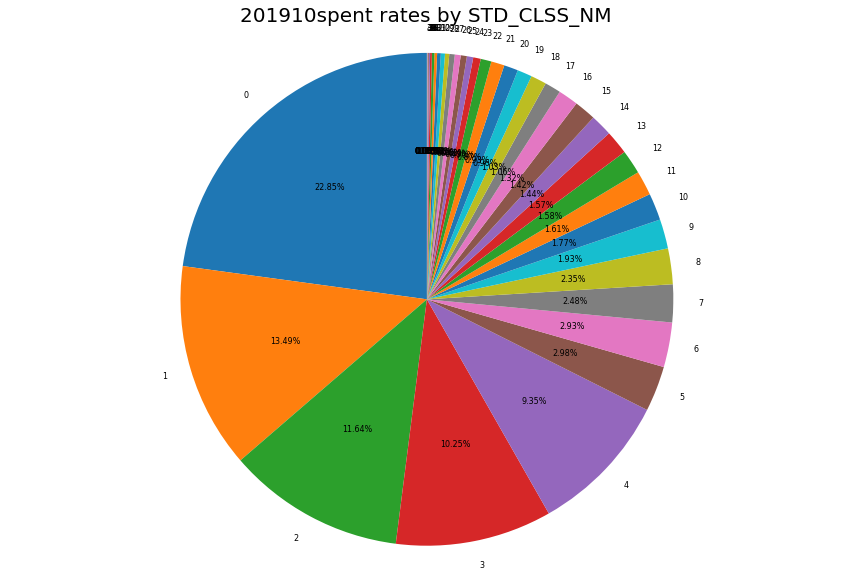

{0: '한식 음식점업', 1: '차량용 주유소 운영업', 2: '기타 대형 종합 소매업', 3: '슈퍼마켓', 4: '체인화 편의점', 5: '택시 운송업', 6: '서양식 음식점업', 7: '스포츠 및 레크레이션 용품 임대업', 8: '기타음식료품위주종합소매업', 9: '비알콜 음료점업', 10: '피자 햄버거 샌드위치 및 유사 음식점업', 11: '그외 기타 종합 소매업', 12: '육류 소매업', 13: '중식 음식점업', 14: '골프장 운영업', 15: '빵 및 과자류 소매업', 16: '일식 음식점업', 17: '기타 외국식 음식점업', 18: '화장품 및 방향제 소매업', 19: '과실 및 채소 소매업', 20: '정기 항공 운송업', 21: '일반유흥 주점업', 22: '면세점', 23: '수산물 소매업', 24: '여관업', 25: '버스 운송업', 26: '호텔업', 27: '차량용 가스 충전업', 28: '욕탕업', 29: '기타 주점업', 30: '전시 및 행사 대행업', 31: '건강보조식품 소매업', 32: '여행사업', 33: '휴양콘도 운영업', 34: '내항 여객 운송업', 35: '자동차 임대업', 36: '마사지업', 37: '관광 민예품 및 선물용품 소매업', 38: '그외 기타 스포츠시설 운영업', 39: '기타 수상오락 서비스업', 40: '그외 기타 분류안된 오락관련 서비스업'}


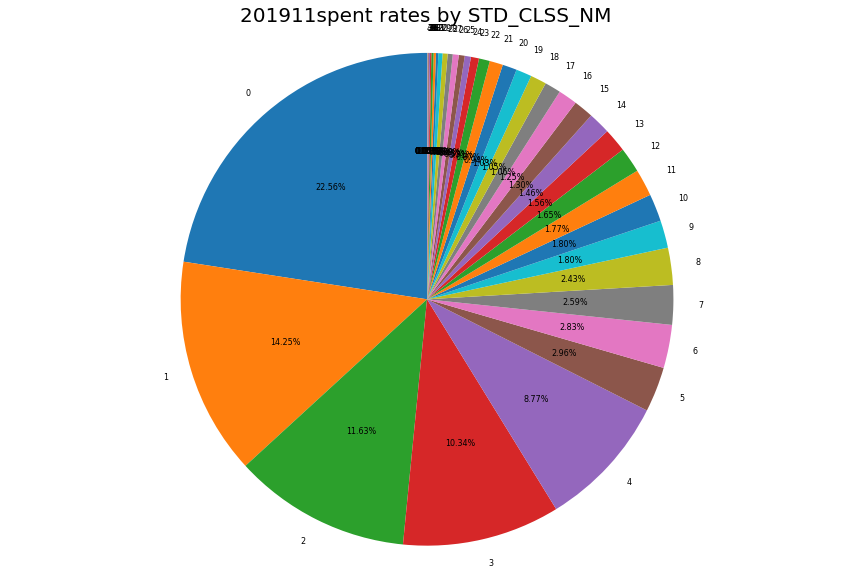

{0: '한식 음식점업', 1: '차량용 주유소 운영업', 2: '기타 대형 종합 소매업', 3: '슈퍼마켓', 4: '체인화 편의점', 5: '택시 운송업', 6: '서양식 음식점업', 7: '스포츠 및 레크레이션 용품 임대업', 8: '기타음식료품위주종합소매업', 9: '육류 소매업', 10: '비알콜 음료점업', 11: '그외 기타 종합 소매업', 12: '피자 햄버거 샌드위치 및 유사 음식점업', 13: '중식 음식점업', 14: '빵 및 과자류 소매업', 15: '일식 음식점업', 16: '골프장 운영업', 17: '기타 외국식 음식점업', 18: '화장품 및 방향제 소매업', 19: '과실 및 채소 소매업', 20: '정기 항공 운송업', 21: '일반유흥 주점업', 22: '면세점', 23: '수산물 소매업', 24: '여관업', 25: '버스 운송업', 26: '차량용 가스 충전업', 27: '호텔업', 28: '욕탕업', 29: '기타 주점업', 30: '여행사업', 31: '건강보조식품 소매업', 32: '전시 및 행사 대행업', 33: '휴양콘도 운영업', 34: '내항 여객 운송업', 35: '자동차 임대업', 36: '관광 민예품 및 선물용품 소매업', 37: '마사지업', 38: '그외 기타 스포츠시설 운영업', 39: '기타 수상오락 서비스업', 40: '그외 기타 분류안된 오락관련 서비스업'}


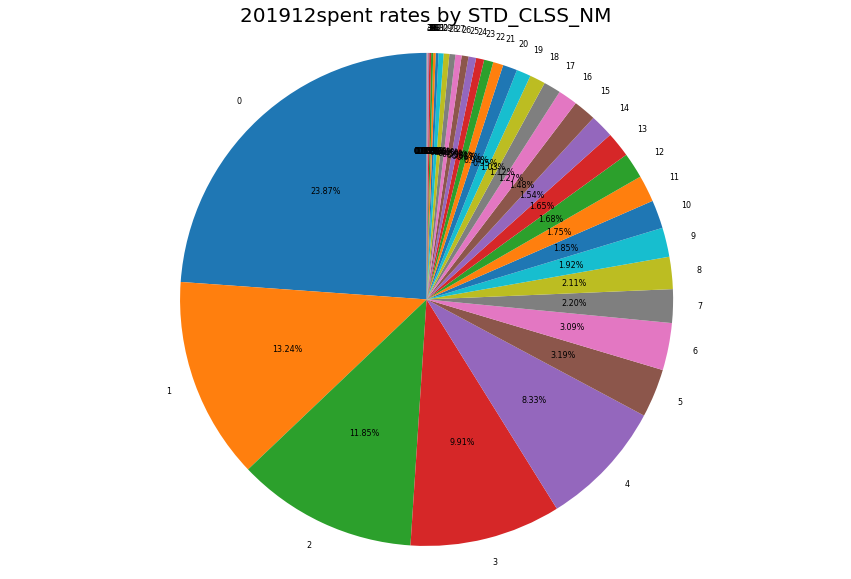

{0: '한식 음식점업', 1: '차량용 주유소 운영업', 2: '기타 대형 종합 소매업', 3: '슈퍼마켓', 4: '체인화 편의점', 5: '서양식 음식점업', 6: '택시 운송업', 7: '기타음식료품위주종합소매업', 8: '스포츠 및 레크레이션 용품 임대업', 9: '육류 소매업', 10: '비알콜 음료점업', 11: '피자 햄버거 샌드위치 및 유사 음식점업', 12: '중식 음식점업', 13: '그외 기타 종합 소매업', 14: '일식 음식점업', 15: '빵 및 과자류 소매업', 16: '정기 항공 운송업', 17: '기타 외국식 음식점업', 18: '일반유흥 주점업', 19: '과실 및 채소 소매업', 20: '화장품 및 방향제 소매업', 21: '면세점', 22: '수산물 소매업', 23: '골프장 운영업', 24: '호텔업', 25: '여관업', 26: '욕탕업', 27: '차량용 가스 충전업', 28: '버스 운송업', 29: '기타 주점업', 30: '여행사업', 31: '전시 및 행사 대행업', 32: '건강보조식품 소매업', 33: '휴양콘도 운영업', 34: '자동차 임대업', 35: '내항 여객 운송업', 36: '마사지업', 37: '관광 민예품 및 선물용품 소매업', 38: '그외 기타 스포츠시설 운영업', 39: '기타 수상오락 서비스업', 40: '그외 기타 분류안된 오락관련 서비스업'}


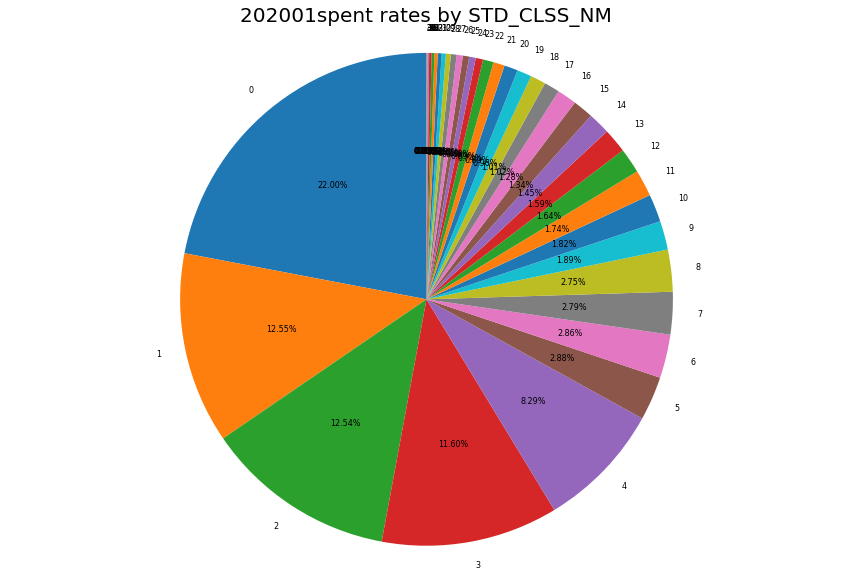

{0: '한식 음식점업', 1: '차량용 주유소 운영업', 2: '기타 대형 종합 소매업', 3: '슈퍼마켓', 4: '체인화 편의점', 5: '택시 운송업', 6: '서양식 음식점업', 7: '육류 소매업', 8: '기타음식료품위주종합소매업', 9: '그외 기타 종합 소매업', 10: '비알콜 음료점업', 11: '피자 햄버거 샌드위치 및 유사 음식점업', 12: '스포츠 및 레크레이션 용품 임대업', 13: '중식 음식점업', 14: '빵 및 과자류 소매업', 15: '과실 및 채소 소매업', 16: '일식 음식점업', 17: '기타 외국식 음식점업', 18: '정기 항공 운송업', 19: '화장품 및 방향제 소매업', 20: '일반유흥 주점업', 21: '면세점', 22: '수산물 소매업', 23: '호텔업', 24: '욕탕업', 25: '여관업', 26: '차량용 가스 충전업', 27: '버스 운송업', 28: '골프장 운영업', 29: '기타 주점업', 30: '건강보조식품 소매업', 31: '휴양콘도 운영업', 32: '여행사업', 33: '전시 및 행사 대행업', 34: '자동차 임대업', 35: '내항 여객 운송업', 36: '마사지업', 37: '관광 민예품 및 선물용품 소매업', 38: '그외 기타 스포츠시설 운영업', 39: '기타 수상오락 서비스업', 40: '그외 기타 분류안된 오락관련 서비스업'}


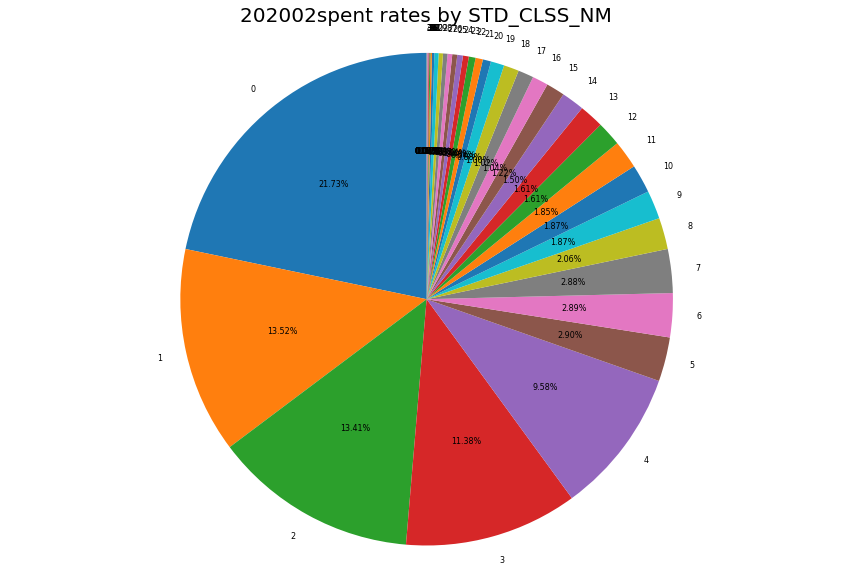

{0: '한식 음식점업', 1: '슈퍼마켓', 2: '차량용 주유소 운영업', 3: '기타 대형 종합 소매업', 4: '체인화 편의점', 5: '택시 운송업', 6: '서양식 음식점업', 7: '기타음식료품위주종합소매업', 8: '육류 소매업', 9: '그외 기타 종합 소매업', 10: '비알콜 음료점업', 11: '피자 햄버거 샌드위치 및 유사 음식점업', 12: '중식 음식점업', 13: '빵 및 과자류 소매업', 14: '스포츠 및 레크레이션 용품 임대업', 15: '일식 음식점업', 16: '화장품 및 방향제 소매업', 17: '과실 및 채소 소매업', 18: '기타 외국식 음식점업', 19: '일반유흥 주점업', 20: '골프장 운영업', 21: '수산물 소매업', 22: '차량용 가스 충전업', 23: '여관업', 24: '면세점', 25: '호텔업', 26: '버스 운송업', 27: '정기 항공 운송업', 28: '욕탕업', 29: '기타 주점업', 30: '건강보조식품 소매업', 31: '휴양콘도 운영업', 32: '전시 및 행사 대행업', 33: '자동차 임대업', 34: '내항 여객 운송업', 35: '여행사업', 36: '마사지업', 37: '관광 민예품 및 선물용품 소매업', 38: '그외 기타 스포츠시설 운영업', 39: '기타 수상오락 서비스업', 40: '그외 기타 분류안된 오락관련 서비스업'}


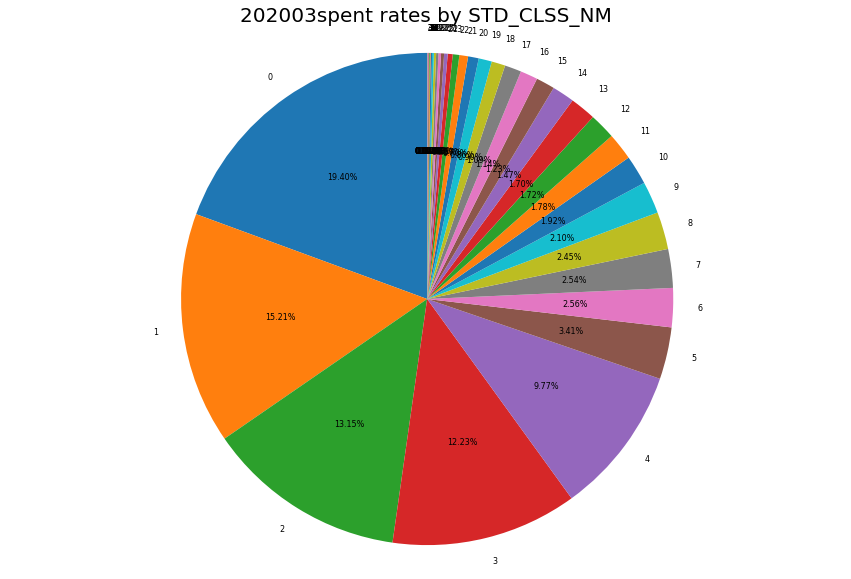

{0: '한식 음식점업', 1: '슈퍼마켓', 2: '차량용 주유소 운영업', 3: '기타 대형 종합 소매업', 4: '체인화 편의점', 5: '기타음식료품위주종합소매업', 6: '육류 소매업', 7: '서양식 음식점업', 8: '택시 운송업', 9: '그외 기타 종합 소매업', 10: '피자 햄버거 샌드위치 및 유사 음식점업', 11: '비알콜 음료점업', 12: '빵 및 과자류 소매업', 13: '스포츠 및 레크레이션 용품 임대업', 14: '중식 음식점업', 15: '과실 및 채소 소매업', 16: '골프장 운영업', 17: '일식 음식점업', 18: '화장품 및 방향제 소매업', 19: '기타 외국식 음식점업', 20: '일반유흥 주점업', 21: '수산물 소매업', 22: '차량용 가스 충전업', 23: '여관업', 24: '기타 주점업', 25: '욕탕업', 26: '건강보조식품 소매업', 27: '버스 운송업', 28: '호텔업', 29: '면세점', 30: '정기 항공 운송업', 31: '자동차 임대업', 32: '전시 및 행사 대행업', 33: '내항 여객 운송업', 34: '휴양콘도 운영업', 35: '마사지업', 36: '관광 민예품 및 선물용품 소매업', 37: '여행사업', 38: '기타 수상오락 서비스업', 39: '그외 기타 스포츠시설 운영업', 40: '그외 기타 분류안된 오락관련 서비스업'}


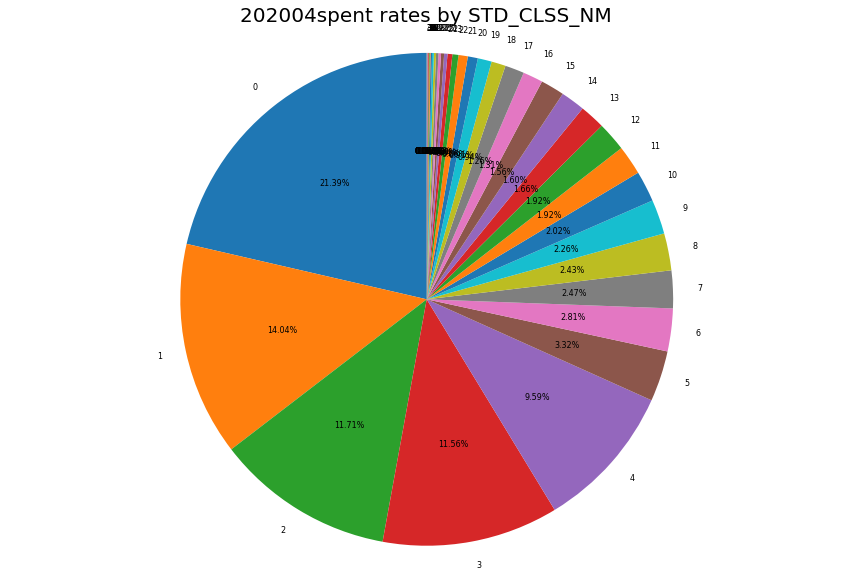

{0: '한식 음식점업', 1: '슈퍼마켓', 2: '차량용 주유소 운영업', 3: '기타 대형 종합 소매업', 4: '체인화 편의점', 5: '기타음식료품위주종합소매업', 6: '서양식 음식점업', 7: '택시 운송업', 8: '육류 소매업', 9: '스포츠 및 레크레이션 용품 임대업', 10: '그외 기타 종합 소매업', 11: '비알콜 음료점업', 12: '피자 햄버거 샌드위치 및 유사 음식점업', 13: '빵 및 과자류 소매업', 14: '중식 음식점업', 15: '골프장 운영업', 16: '과실 및 채소 소매업', 17: '일식 음식점업', 18: '기타 외국식 음식점업', 19: '화장품 및 방향제 소매업', 20: '일반유흥 주점업', 21: '수산물 소매업', 22: '차량용 가스 충전업', 23: '여관업', 24: '기타 주점업', 25: '욕탕업', 26: '건강보조식품 소매업', 27: '버스 운송업', 28: '호텔업', 29: '정기 항공 운송업', 30: '면세점', 31: '전시 및 행사 대행업', 32: '자동차 임대업', 33: '내항 여객 운송업', 34: '휴양콘도 운영업', 35: '마사지업', 36: '관광 민예품 및 선물용품 소매업', 37: '여행사업', 38: '기타 수상오락 서비스업', 39: '그외 기타 스포츠시설 운영업', 40: '그외 기타 분류안된 오락관련 서비스업'}
                          201901     201902  ...     202003     202004
건강보조식품 소매업              0.212702   0.211690  ...   0.167870   0.165189
골프장 운영업                 0.294580   0.444162  ...   1.143057   1.558061
과실 및 채소 소매업             1.091665   1.127860  ...   1.229190   1.312978
관광 민예품 및 선물용품 소매업     

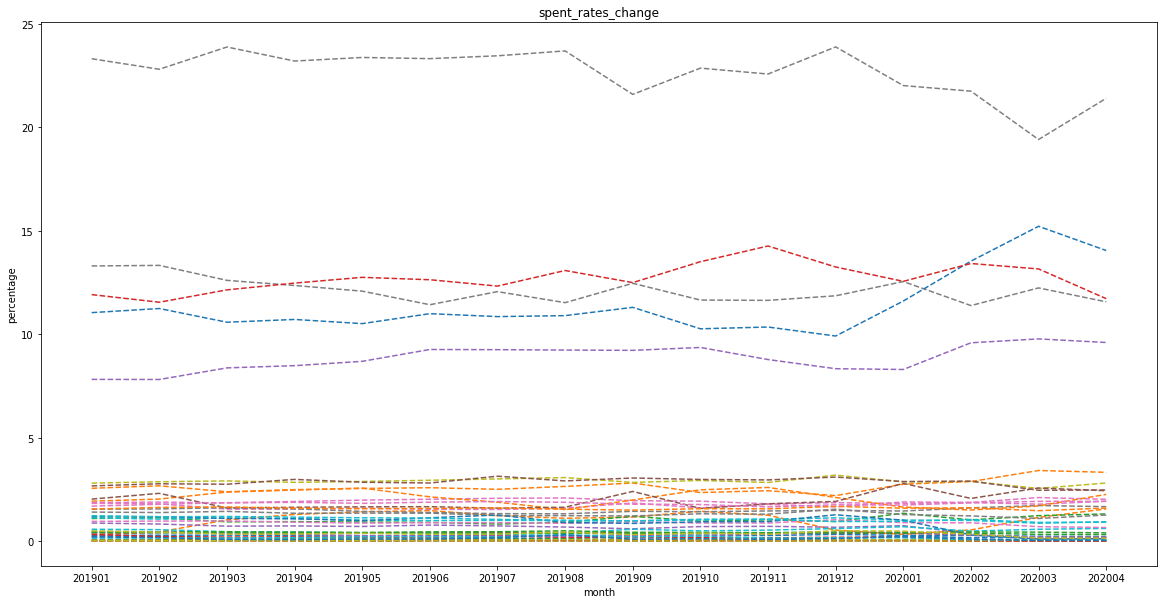

[(22.64405520161771, '한식 음식점업'), (12.692346637892543, '차량용 주유소 운영업'), (12.117316965450076, '기타 대형 종합 소매업'), (11.432674665945514, '슈퍼마켓'), (8.859876165059045, '체인화 편의점'), (2.8859216281208724, '서양식 음식점업'), (2.8514100499612645, '택시 운송업'), (2.6555863895482776, '기타음식료품위주종합소매업'), (2.071727611342009, '스포츠 및 레크레이션 용품 임대업'), (1.9780077754412237, '육류 소매업'), (1.8940812391018742, '비알콜 음료점업'), (1.83301584926959, '피자 햄버거 샌드위치 및 유사 음식점업'), (1.7306404184037285, '그외 기타 종합 소매업'), (1.5783529021998979, '중식 음식점업'), (1.497499721025995, '빵 및 과자류 소매업'), (1.308858431980155, '일식 음식점업'), (1.0527386098531244, '화장품 및 방향제 소매업'), (1.043110828709289, '과실 및 채소 소매업'), (1.0255128100178252, '기타 외국식 음식점업'), (1.0132908484394236, '골프장 운영업'), (0.8954904767583933, '정기 항공 운송업'), (0.8847084515454212, '일반유흥 주점업'), (0.627685064568022, '면세점'), (0.5013576766603028, '수산물 소매업'), (0.42188515534098486, '여관업'), (0.39445918968692206, '차량용 가스 충전업'), (0.36497008947170284, '버스 운송업'), (0.35672439906994835, '호텔업'), (0.30836975266716443, '욕탕업'

In [10]:
if __name__ == '__main__':
    monthly_spent_hash = recall_monthly_spent_hash()
    months = generate_month_list()
    for month in months:
        month_XcolumnX_spent_figure(month_spent = monthly_spent_hash[month], column = 'STD_CLSS_NM')
    spent_rates_df = XcolumnX_spent_rate_df(monthly_spent_hash, column = 'STD_CLSS_NM')
    print(spent_rates_df)
    spent_rates_graph(spent_rates_df)
    print(spent_rates_mean(spent_rates_df))

In [ ]:
# 각 지역별로 각 category가 어떤 비율인지 df 로 구하자.
def location_category_mean(monthly_spent_hash, locations, category):
    months = generate_month_list()
    location_category_mean_hash = {}

    for location in locations:
        spent_rates_df = pd.DataFrame(columns = months)
        for month in months:
            month_spent = monthly_spent_hash[month]
            spent = []
            for cate in category:
                spent.append(month_spent[(month_spent['CARD_SIDO_NM'] == location) & (month_spent['STD_CLSS_NM'] == cate)].dropna()['AMT'].sum())
            denom = sum(spent)/100
            spent_rates = [s/denom for s in spent]
            spent_rates_df[month] = pd.Series(spent_rates, index = category)

        location_category_mean_hash[location] = spent_rates_df.mean(axis = 1)

    return location_category_mean_hash

location_category_mean_hash = location_category_mean(monthly_spent_hash, locations, category)
print(location_category_mean_hash['서울'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  


건강보조식품 소매업                0.141898
골프장 운영업                   0.033018
과실 및 채소 소매업               0.759450
관광 민예품 및 선물용품 소매업         0.022383
그외 기타 분류안된 오락관련 서비스업      0.000000
그외 기타 스포츠시설 운영업           0.004116
그외 기타 종합 소매업              3.933046
기타 대형 종합 소매업             10.209504
기타 수상오락 서비스업              0.000670
기타 외국식 음식점업               1.038716
기타 주점업                    0.208184
기타음식료품위주종합소매업             2.638870
내항 여객 운송업                 0.196593
마사지업                      0.028834
면세점                       0.288269
버스 운송업                    1.141636
비알콜 음료점업                  3.270923
빵 및 과자류 소매업               1.543665
서양식 음식점업                  4.586585
수산물 소매업                   0.324740
슈퍼마켓                      8.518780
스포츠 및 레크레이션 용품 임대업        1.909594
여관업                       0.360344
여행사업                      0.695915
욕탕업                       0.265062
육류 소매업                    1.450512
일반유흥 주점업                  0.533064
일식 음식점업                   1.910641
자동차 임대업             

In [ ]:
location_category_mean_hash['서울'].sum()

100.0

파이 그래프 보다는 선형으로 보는것이 변화 살피는 데에 좋을듯.

In [ ]:
monthly_df_hash[202003]

,REG_YYMM,CARD_SIDO_NM,CARD_CCG_NM,STD_CLSS_NM,HOM_SIDO_NM,HOM_CCG_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT
23437284,202003,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,1,2,6,2529000,6
23437285,202003,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,1,3,10,1133650,9
23437286,202003,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,2,3,3,570800,3
23437287,202003,강원,강릉시,건강보조식품 소매업,강원,강릉시,50s,1,4,25,4192828,25
23437288,202003,강원,강릉시,건강보조식품 소매업,강원,강릉시,50s,2,4,21,3358900,24
...,...,...,...,...,...,...,...,...,...,...,...,...
24697787,202003,충북,충주시,휴양콘도 운영업,충북,충주시,30s,1,2,3,43300,4
24697788,202003,충북,충주시,휴양콘도 운영업,충북,충주시,40s,1,3,3,35000,3
24697789,202003,충북,충주시,휴양콘도 운영업,충북,충주시,50s,1,4,4,188000,6
24697790,202003,충북,충주시,휴양콘도 운영업,충북,충주시,50s,2,4,4,99000,6


In [ ]:
def recall_monthly_spent_hash():
    months = generate_month_list()
    monthly_spent_hash = {}
    print('start to recall monthly_spent_hash')
    for month in months:
        monthly_spent_hash[month] = pd.read_csv(path + str(month) + '.csv')
    return monthly_spent_hash

monthly_spent_hash = recall_monthly_spent_hash()

start to recall monthly_spent_hash


In [ ]:
monthly_spent_hash[202003]

,Unnamed: 0,REG_YYMM,CARD_SIDO_NM,STD_CLSS_NM,AMT
0,0,202003,강원,건강보조식품 소매업,96059012
1,1,202003,강원,골프장 운영업,2915797995
2,2,202003,강원,과실 및 채소 소매업,994816943
3,3,202003,강원,관광 민예품 및 선물용품 소매업,13317300
4,4,202003,강원,그외 기타 분류안된 오락관련 서비스업,0
...,...,...,...,...,...
692,692,202003,충북,피자 햄버거 샌드위치 및 유사 음식점업,1307077599
693,693,202003,충북,한식 음식점업,15969441149
694,694,202003,충북,호텔업,15248550
695,695,202003,충북,화장품 및 방향제 소매업,428796034


In [ ]:
from decimal import Decimal
def total_spent_graph(monthly_spent_hash):
    plt.rcParams['figure.figsize'] = [20, 10]
    x = generate_month_list()
    y = [monthly_spent_hash[month]['AMT'].sum() for month in x]
    x = [str(elt) for elt in x]
    for i in range(len(x)):
      print(x[i],':','%.2E' % Decimal(int(y[i])),end = '  ' )
    plt.title('total_spent_graph')
    plt.bar(x,y, width=0.3,alpha=0.3)
    plt.plot(x,y, 'r--')
    plt.xlabel('month')
    plt.ylabel('total spent')
    plt.show()

201901 : 4.03E+12  201902 : 3.62E+12  201903 : 4.08E+12  201904 : 3.98E+12  201905 : 4.32E+12  201906 : 4.10E+12  201907 : 4.16E+12  201908 : 4.25E+12  201909 : 4.10E+12  201910 : 4.15E+12  201911 : 4.03E+12  201912 : 4.27E+12  202001 : 4.10E+12  202002 : 3.35E+12  202003 : 3.42E+12  

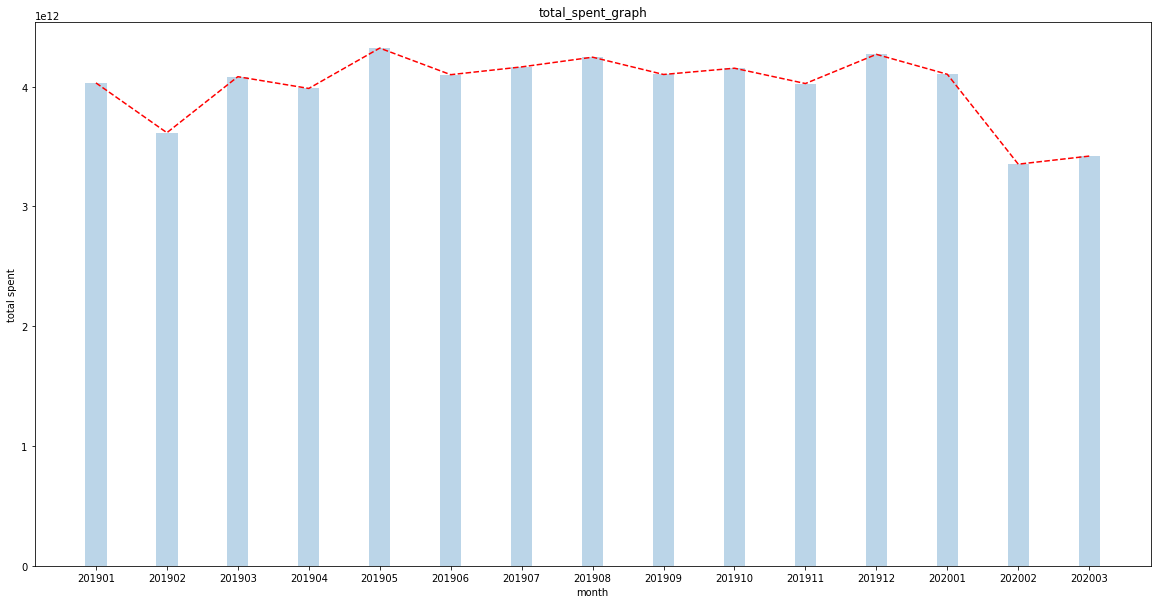

In [ ]:
total_spent_graph(monthly_spent_hash)

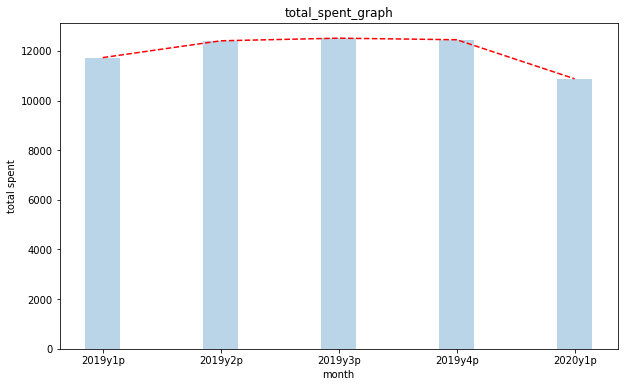

In [ ]:
def periodic_spent_graph(monthly_spent_hash):
    plt.rcParams['figure.figsize'] = [10, 6]
    tenbil = 1000000000
    x = ['2019y1p','2019y2p','2019y3p','2019y4p','2020y1p']
    y_temp = [monthly_spent_hash[month]['AMT'].sum() for month in generate_month_list()]
    y = [(y_temp[3*i] + y_temp[3*i+1] + y_temp[3*i+2])/tenbil for i in range(5)]
    plt.title('total_spent_graph')
    plt.bar(x,y, width=0.3,alpha=0.3)
    plt.plot(x,y, 'r--')
    plt.xlabel('month')
    plt.ylabel('total spent')
    plt.show()

periodic_spent_graph(monthly_spent_hash)

In [ ]:
# gdp 출처 : 한국은행「국민소득」 단위 : 십억원, 통계표명 : 국내총생산 및 경제성장률
def gdp_data():
    gdp_df = read_data_to_dataframe(path + 'gdp.csv').dropna().iloc[:, 5:]

    def get_int(data):
        if type(data) == type('a'):
            data = str(data).replace(',', '')
            return float(data)
        else:
            return data

    return gdp_df.applymap(get_int)

def gdp_graph(gdp_df):
    plt.rcParams['figure.figsize'] = [30, 10]
    num_to_split = 10
    length = len(gdp_df.columns)
    for i in range(num_to_split):
        from_idx = int(i * length/num_to_split)
        to_idx = int((i+1) * length/num_to_split)
        gdp_df_temp = gdp_df.iloc[:,from_idx:to_idx]

        x = [string[:4] + 'y' + string[4] + 'p' for string in gdp_df_temp.columns]
        y1 = gdp_df_temp.iloc[0, :]
        y2 = gdp_df_temp.iloc[1, :]
        fig = plt.figure()
        ax1 = fig.add_subplot(1, 2, 1)
        ax2 = fig.add_subplot(1, 2, 2)
    
        ax1.plot(x, y1,'r')
        ax1.bar(x, y1,width=0.1,alpha=0.3)
        ax1.set_xlabel('period')
        ax1.set_ylabel('GDP')
    
        ax2.plot(x, y2,'r')
        ax2.bar(x, y2,width=0.1,alpha=0.3)
        ax1.set_xlabel('period')
        ax1.set_ylabel('growth rate')
        fig.autofmt_xdate(rotation=45)
        plt.show()

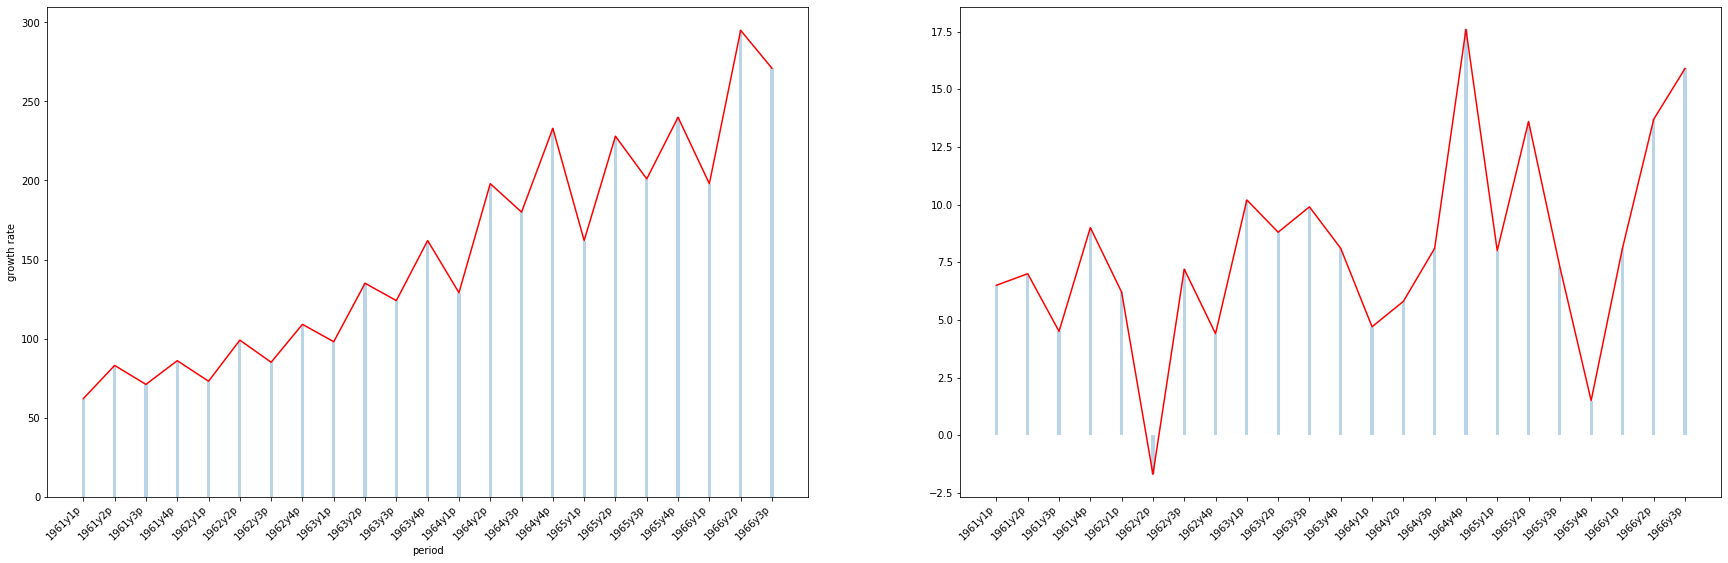

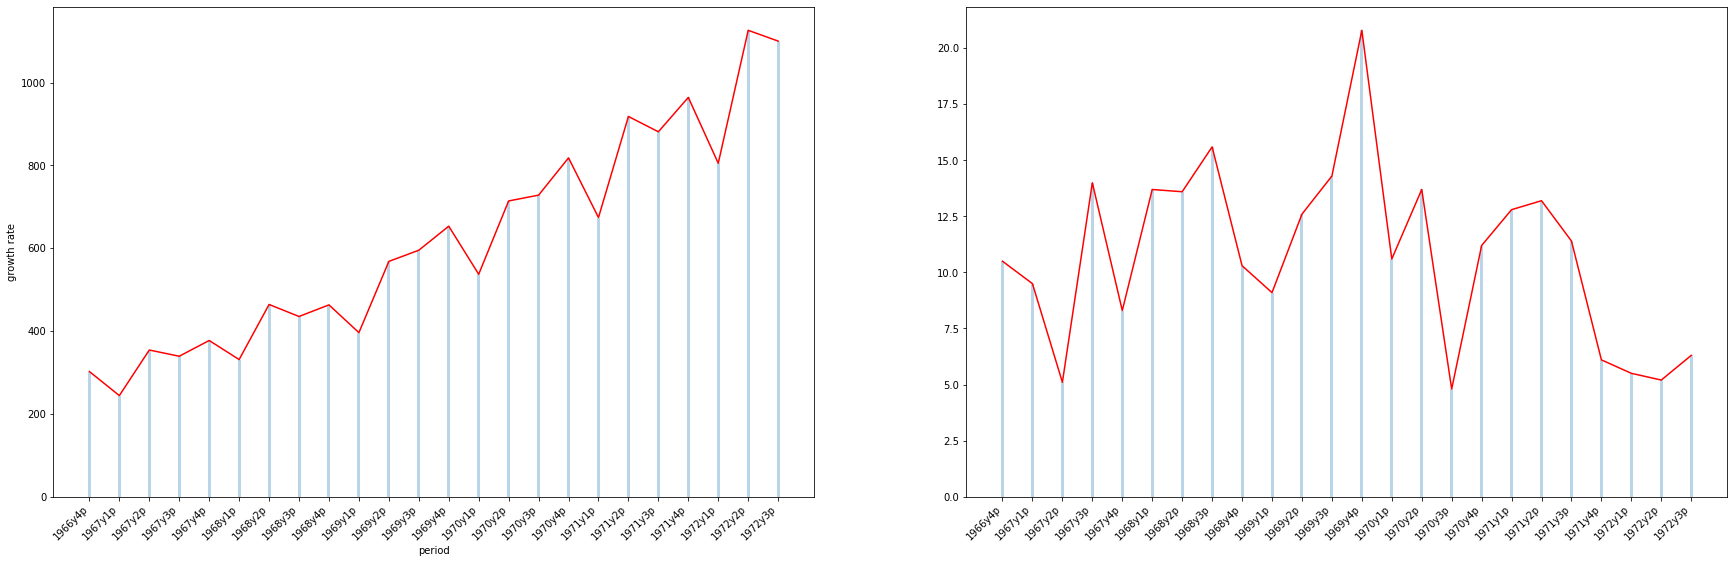

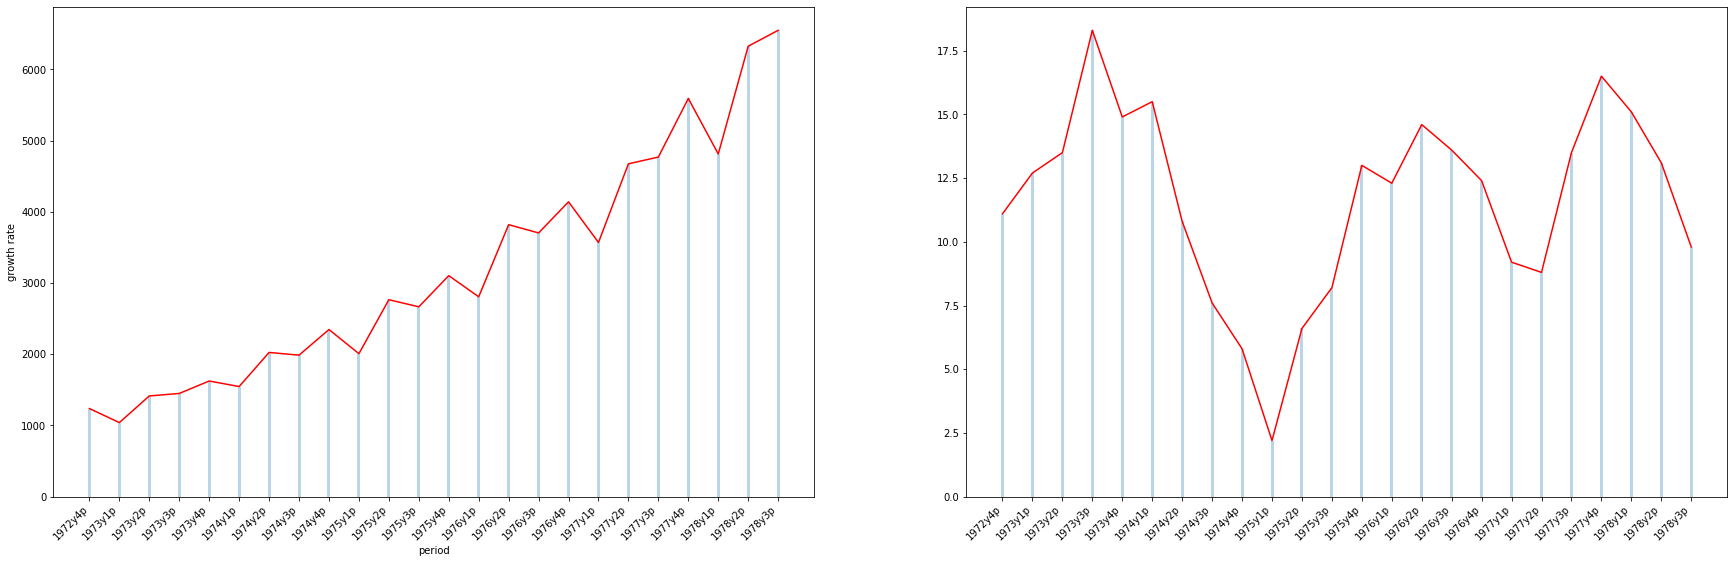

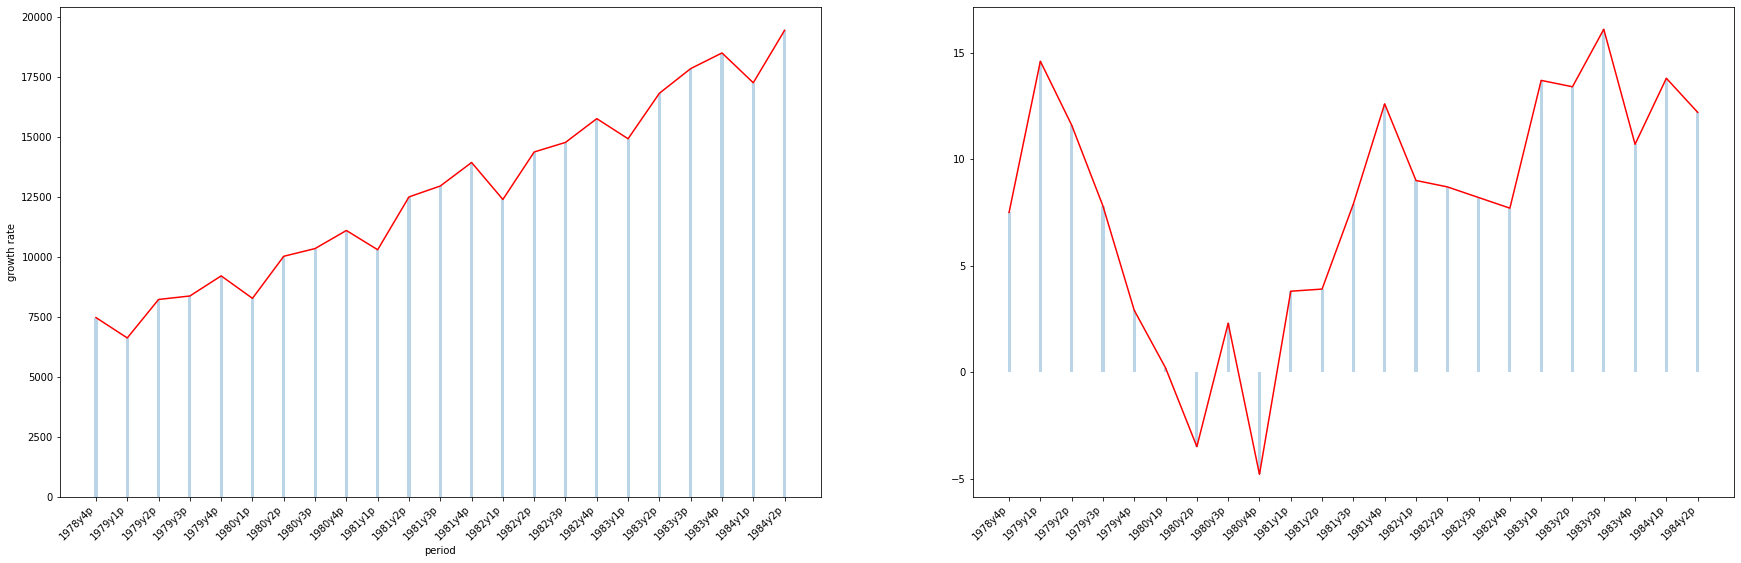

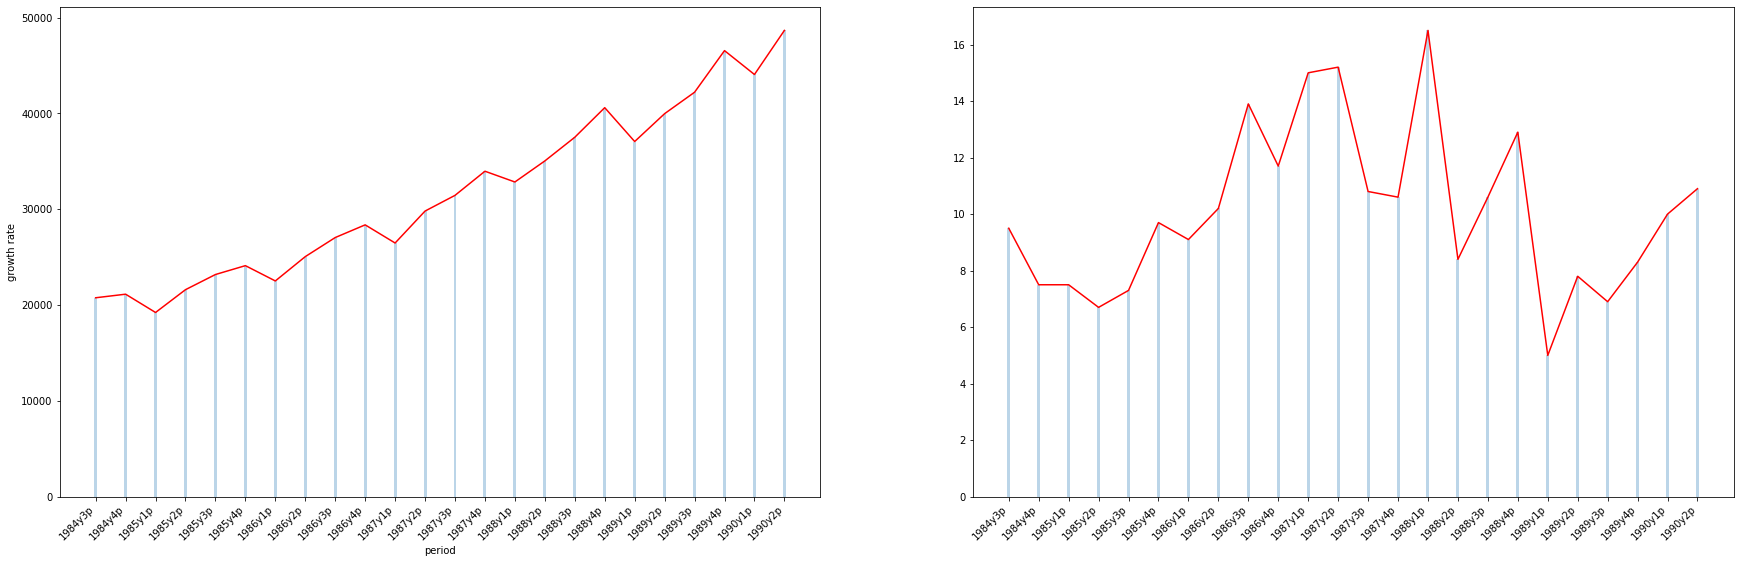

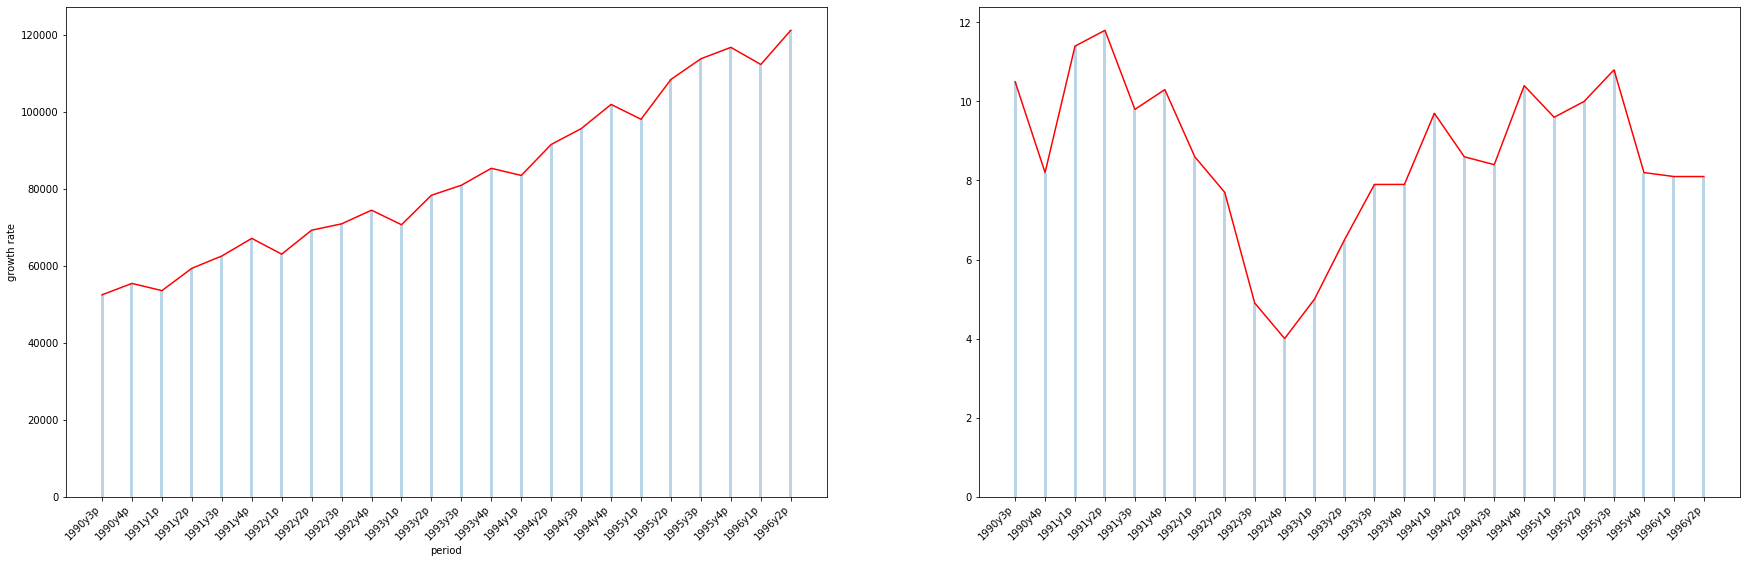

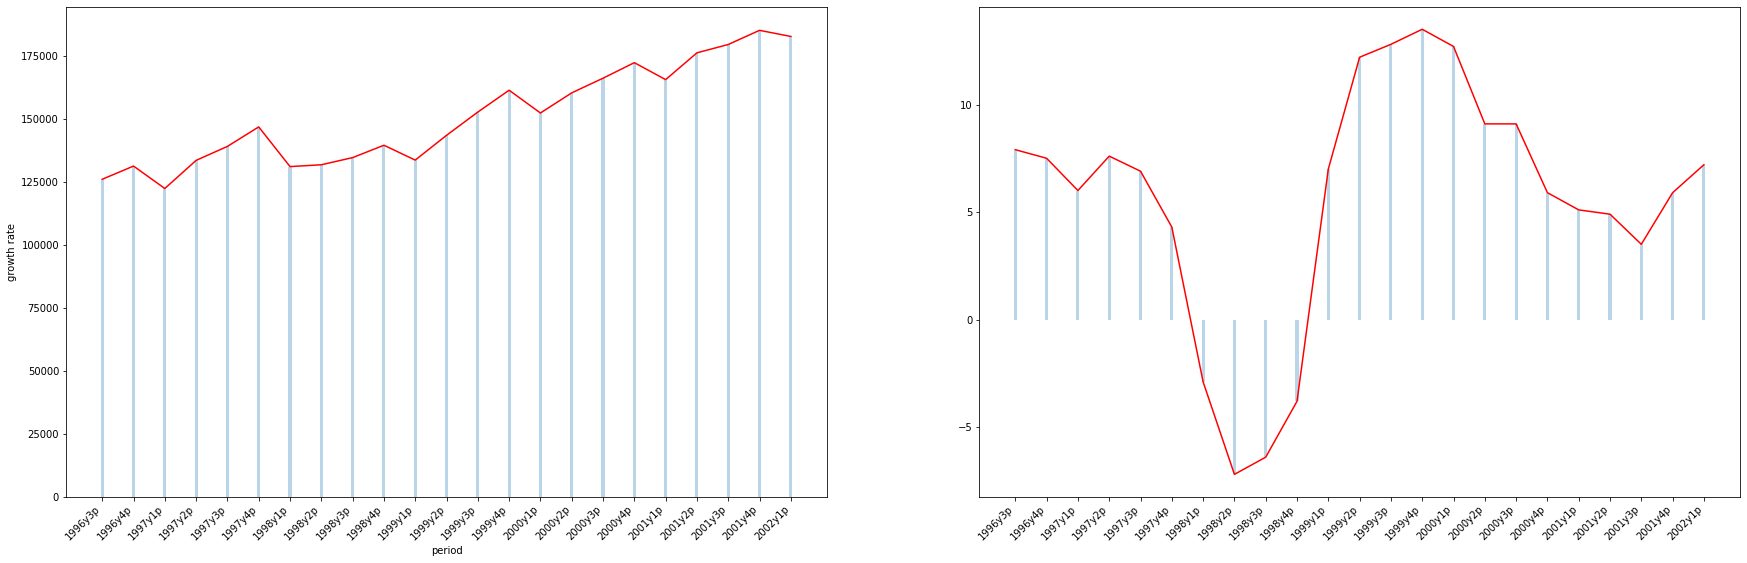

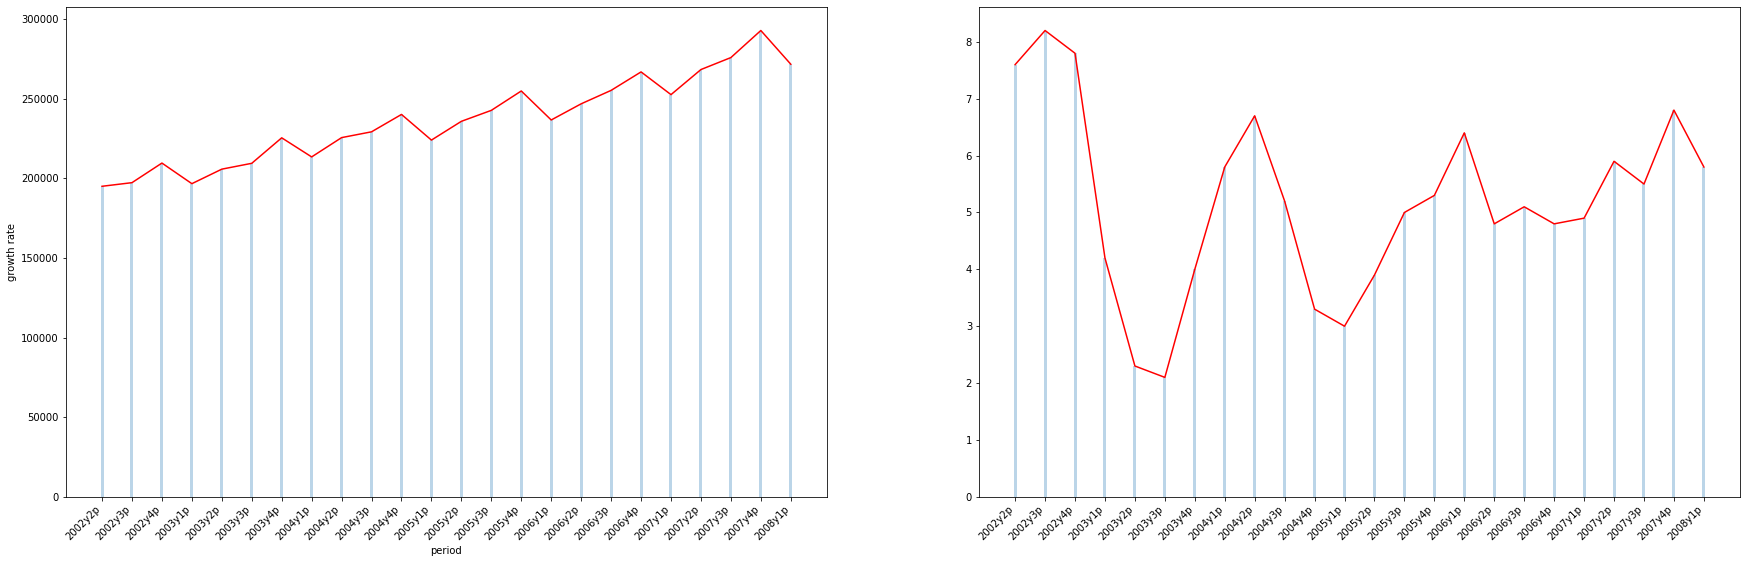

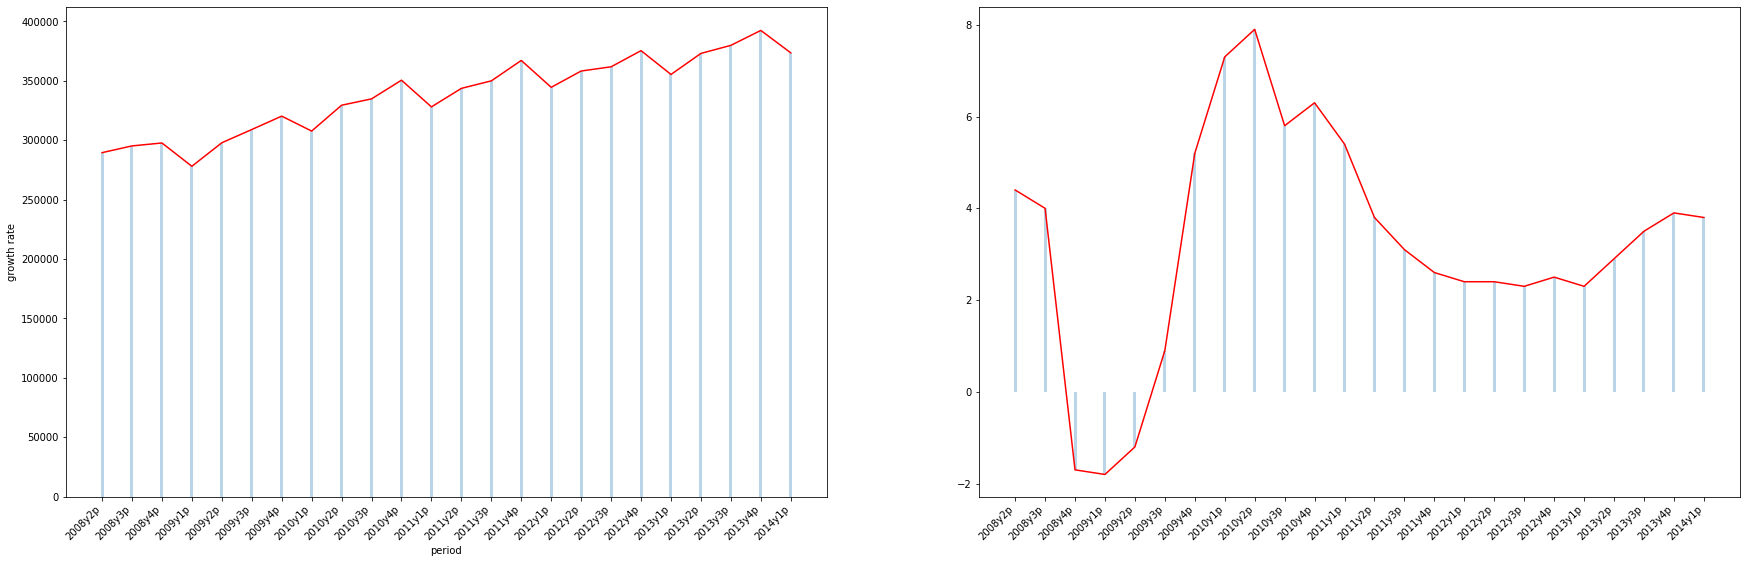

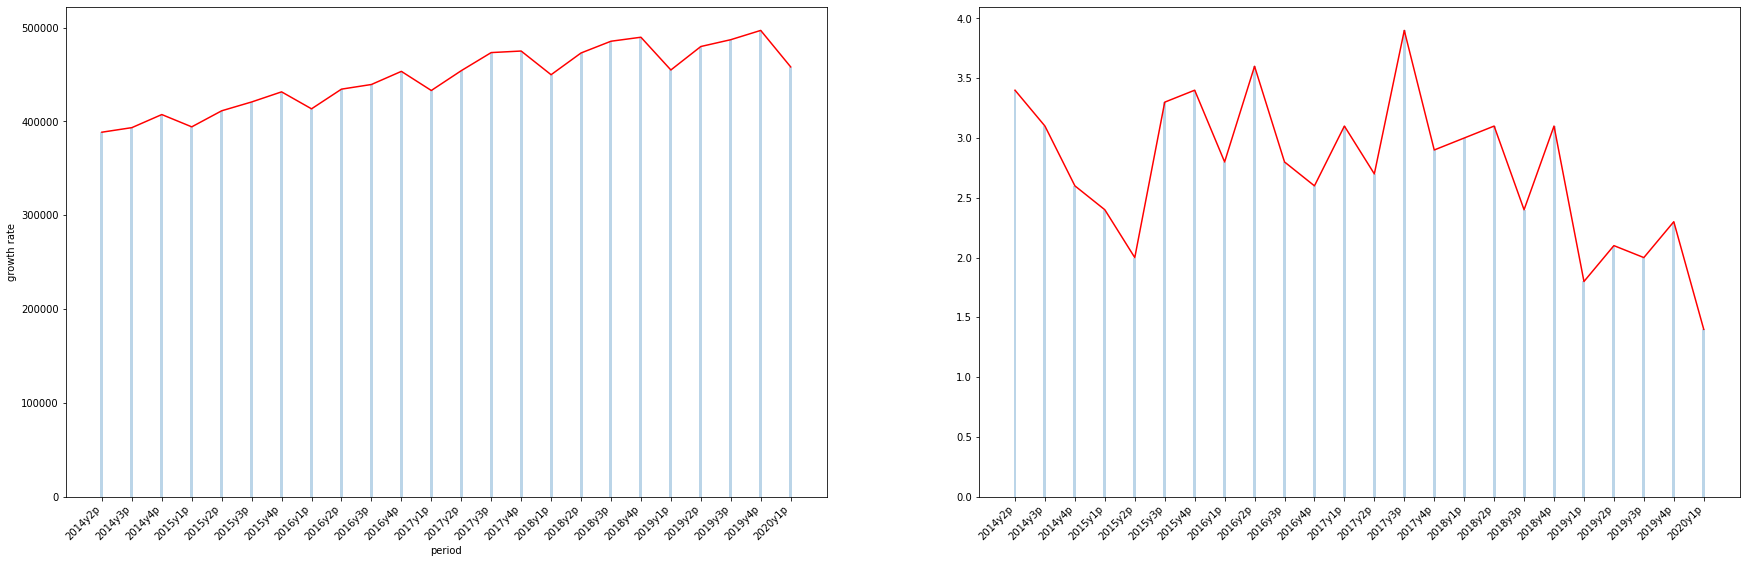

,19611/4,19612/4,19613/4,19614/4,19621/4,19622/4,19623/4,19624/4,19631/4,19632/4,19633/4,19634/4,19641/4,19642/4,19643/4,19644/4,19651/4,19652/4,19653/4,19654/4,19661/4,19662/4,19663/4,19664/4,19671/4,19672/4,19673/4,19674/4,19681/4,19682/4,19683/4,19684/4,19691/4,19692/4,19693/4,19694/4,19701/4,19702/4,19703/4,19704/4,...,20102/4,20103/4,20104/4,20111/4,20112/4,20113/4,20114/4,20121/4,20122/4,20123/4,20124/4,20131/4,20132/4,20133/4,20134/4,20141/4,20142/4,20143/4,20144/4,20151/4,20152/4,20153/4,20154/4,20161/4,20162/4,20163/4,20164/4,20171/4,20172/4,20173/4,20174/4,20181/4,20182/4,20183/4,20184/4,20191/4,20192/4,20193/4,20194/4,20201/4
0,62.0,83.0,71.0,86.0,73.0,99.0,85.0,109.0,98.0,135.0,124.0,162.0,129.0,198.0,180.0,233.0,162.0,228.0,201.0,240.0,198.0,295.0,271.0,302.0,244.0,354.0,339.0,377.0,331.0,464.0,435.0,463.0,396.0,568.0,595.0,653.0,537.0,714.0,728.0,818.0,...,329481.0,334834.0,350559.0,328096.0,343679.0,349987.0,367175.0,344575.0,358276.0,361834.0,375427.0,355385.0,373097.0,379887.0,392451.0,373560.0,388567.0,393425.0,407377.0,394273.0,411387.0,420791.0,431570.0,413483.0,434463.0,439422.0,453412.0,433027.0,454142.0,473436.0,475093.0,449838.0,473018.0,485536.0,489801.0,454891.0,479907.0,487177.0,497065.0,458202.0
1,6.5,7.0,4.5,9.0,6.2,-1.7,7.2,4.4,10.2,8.8,9.9,8.1,4.7,5.8,8.1,17.6,8.0,13.6,7.3,1.5,8.1,13.7,15.9,10.5,9.5,5.1,14.0,8.3,13.7,13.6,15.6,10.3,9.1,12.6,14.3,20.8,10.6,13.7,4.8,11.2,...,7.9,5.8,6.3,5.4,3.8,3.1,2.6,2.4,2.4,2.3,2.5,2.3,2.9,3.5,3.9,3.8,3.4,3.1,2.6,2.4,2.0,3.3,3.4,2.8,3.6,2.8,2.6,3.1,2.7,3.9,2.9,3.0,3.1,2.4,3.1,1.8,2.1,2.0,2.3,1.4


In [ ]:
gdp_df = gdp_data()
gdp_graph(gdp_df)
gdp_df

1.GDP 만 고려

In [ ]:
'''def gdp_data():
    gdp_df = read_data_to_dataframe(path + 'gdp.csv').dropna().iloc[:, 5:]

    def get_int(data):
        if type(data) == type('a'):
            data = str(data).replace(',', '')
            return float(data)
        else:
            return data

    return gdp_df.applymap(get_int)

def gdp_data4modeling(gdp_df):
    train = [ list(gdp_df.iloc[0,4*i:4*i+7]) for i in range(len(gdp_df.columns)//4 - 1)  ]
    for i in range(len(train)):
        denom = train[i][0]
        train[i] = [elt/denom - 1 for elt in train[i]]
    train = np.array(train)
    np.random.shuffle(train)
    x_train = train[:,:5]
    y_train = train[:,5:]
    
    i = len(gdp_df.columns)//4 - 1
    denom = gdp_df.iloc[0,4*i]
    x_res = np.array([ 0, gdp_df.iloc[0,4*i+1]/denom - 1, gdp_df.iloc[0,4*i+2]/denom - 1, gdp_df.iloc[0,4*i+3]/denom - 1, gdp_df.iloc[0,4*i+4]/denom - 1 ])

    x_train = x_train.reshape(x_train.shape[0],5,1)
    y_train = y_train.reshape(y_train.shape[0],1,2)
    x_res = x_res .reshape(1,5,1)
    
    return x_train, y_train, x_res, denom

def gdp_model2predict(x_train, y_train, x_res, denom):
    model = Sequential()
    model.add(layers.GRU(2, return_sequences=True, input_shape=(5, 1)))
    model.add(layers.GRU(5, return_sequences=False))
    model.add(layers.Dense(2, activation='linear'))
    model.compile(loss='MSE', optimizer='adam', metrics=['accuracy'])
    history = model.fit(x_train, y_train, epochs=200, batch_size=10, verbose=0)
    plt.rcParams['figure.figsize'] = [5, 5]
    plt.plot(history.history['accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train'], loc='upper left')
    plt.show()
    temp = model.predict(x_res)
    gdp_20y2p = (temp[0][0] + 1) * denom
    gdp_20y3p = (temp[0][1] + 1) * denom
    return gdp_20y2p, gdp_20y3p
'''

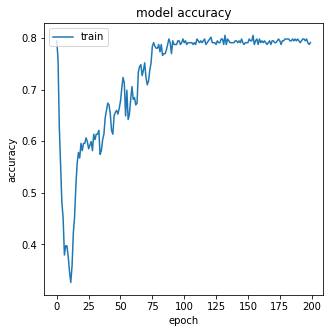

619856.8854183555 623458.4819912612


In [ ]:
'''if __name__ == '__main__':
    gdp_df = gdp_data()
    x_train, y_train, x_res, denom = gdp_data4modeling(gdp_df)
    gdp_20y2p, gdp_20y3p = gdp_model2predict(x_train, y_train, x_res, denom)
    print(gdp_20y2p, gdp_20y3p)''' 버림.

2.GDP + percentile 모두 가공후 고려

In [ ]:
def gdp_data():
    gdp_df = read_data_to_dataframe(path + 'gdp.csv').dropna().iloc[:, 5:]

    def get_int(data):
        if type(data) == type('a'):
            data = str(data).replace(',', '')
            return float(data)
        else:
            return data

    return gdp_df.applymap(get_int)


def gdp_data4modeling(gdp_df):
    train = [[list(gdp_df.iloc[0, 4 * i:4 * i + 7]),list(gdp_df.iloc[1, 4 * i:4 * i + 7])] for i in range(len(gdp_df.columns) // 4 - 1)]
    for i in range(len(train)):
        denom1 = train[i][0][0]
        denom2 = train[i][1][0]
        train[i][0] = [elt / denom1 - 1 for elt in train[i][0]]
        train[i][1] = [elt / denom2 - 1 for elt in train[i][1]]
    train = np.array(train)
    train = train.transpose((0,2,1))
    np.random.shuffle(train)
    x_train = train[:,:5,:]
    y_train = train[:,5:,0]

    i = len(gdp_df.columns) // 4 - 1
    denom1 = gdp_df.iloc[0, 4 * i]
    denom2 = gdp_df.iloc[1, 4 * i]

    x_res = np.array( gdp_df.iloc[:,4*i:4*i+5] )
    x_res[0] = [elt / denom1 - 1 for elt in x_res[0]]
    x_res[1] = [elt / denom2 - 1 for elt in x_res[1]]
    x_res = x_res.reshape(1, 2, 5)
    x_res = x_res.transpose((0,2,1))

    return x_train, y_train, x_res, denom1

gdp_df = gdp_data()
x_train, y_train, x_res, denom = gdp_data4modeling(gdp_df)

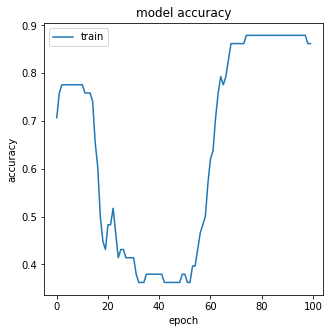

(497899.60808619857, 507285.81339138746)

In [ ]:
def gdp_model2predict(x_train, y_train, x_res, denom):
    model = Sequential()
    model.add(layers.GRU(2, return_sequences=True, input_shape=(5, 2)))
    model.add(layers.GRU(5, return_sequences=False))
    model.add(layers.Dense(2, activation='linear'))
    model.compile(loss='MSE', optimizer='adam', metrics=['accuracy'])
    history = model.fit(x_train, y_train, epochs=100, batch_size=10, verbose=0)
    plt.plot(history.history['accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train'], loc='upper left')
    plt.show()
    temp = model.predict(x_res)
    gdp_20y2p = (temp[0][0] + 1) * denom
    gdp_20y3p = (temp[0][1] + 1) * denom
    return gdp_20y2p, gdp_20y3p

gdp_model2predict(x_train, y_train, x_res, denom)

3.GDP만 가공 + percentile 고려

In [ ]:
def gdp_data():
    gdp_df = read_data_to_dataframe(path + 'gdp.csv').dropna().iloc[:, 5:]

    def get_int(data):
        if type(data) == type('a'):
            data = str(data).replace(',', '')
            return float(data)
        else:
            return data

    return gdp_df.applymap(get_int)


def gdp_data4modeling(gdp_df):
    train = [[list(gdp_df.iloc[0, 4 * i:4 * i + 7]),list(gdp_df.iloc[1, 4 * i:4 * i + 7])] for i in range(len(gdp_df.columns) // 4 - 1)]
    for i in range(len(train)):
        denom1 = train[i][0][0]
        train[i][0] = [elt / denom1 - 1 for elt in train[i][0]]
    train = np.array(train)
    train = train.transpose((0,2,1))
    np.random.shuffle(train)
    x_train = train[:,:5,:]
    y_train = train[:,5:,0]

    i = len(gdp_df.columns) // 4 - 1
    denom1 = gdp_df.iloc[0, 4 * i]

    x_res = np.array( gdp_df.iloc[:,4*i:4*i+5] )
    x_res[0] = [elt / denom1 - 1 for elt in x_res[0]]
    x_res = x_res.reshape(1, 2, 5)
    x_res = x_res.transpose((0,2,1))

    return x_train, y_train, x_res, denom1

gdp_df = gdp_data()
x_train, y_train, x_res, denom = gdp_data4modeling(gdp_df)

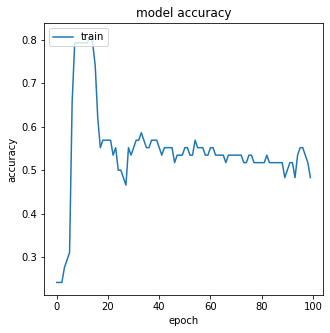

(485595.5133285299, 502815.6117797643)

In [ ]:
def gdp_model2predict(x_train, y_train, x_res, denom):
    model = Sequential()
    model.add(layers.GRU(2, return_sequences=True, input_shape=(5, 2)))
    model.add(layers.GRU(5, return_sequences=False))
    model.add(layers.Dense(2, activation='linear'))
    model.compile(loss='MSE', optimizer='adam', metrics=['accuracy'])
    history = model.fit(x_train, y_train, epochs=100, batch_size=10, verbose=0)
    plt.plot(history.history['accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train'], loc='upper left')
    plt.show()
    temp = model.predict(x_res)
    gdp_20y2p = (temp[0][0] + 1) * denom
    gdp_20y3p = (temp[0][1] + 1) * denom
    return gdp_20y2p, gdp_20y3p

gdp_20y2p, gdp_20y3p = gdp_model2predict(x_train, y_train, x_res, denom)
print('gdp_20y2p, gdp_20y3p : ',gdp_20y2p, gdp_20y3p)

In [ ]:
gdp_df

,19611/4,19612/4,19613/4,19614/4,19621/4,19622/4,19623/4,19624/4,19631/4,19632/4,19633/4,19634/4,19641/4,19642/4,19643/4,19644/4,19651/4,19652/4,19653/4,19654/4,19661/4,19662/4,19663/4,19664/4,19671/4,19672/4,19673/4,19674/4,19681/4,19682/4,19683/4,19684/4,19691/4,19692/4,19693/4,19694/4,19701/4,19702/4,19703/4,19704/4,...,20102/4,20103/4,20104/4,20111/4,20112/4,20113/4,20114/4,20121/4,20122/4,20123/4,20124/4,20131/4,20132/4,20133/4,20134/4,20141/4,20142/4,20143/4,20144/4,20151/4,20152/4,20153/4,20154/4,20161/4,20162/4,20163/4,20164/4,20171/4,20172/4,20173/4,20174/4,20181/4,20182/4,20183/4,20184/4,20191/4,20192/4,20193/4,20194/4,20201/4
0,62.0,83.0,71.0,86.0,73.0,99.0,85.0,109.0,98.0,135.0,124.0,162.0,129.0,198.0,180.0,233.0,162.0,228.0,201.0,240.0,198.0,295.0,271.0,302.0,244.0,354.0,339.0,377.0,331.0,464.0,435.0,463.0,396.0,568.0,595.0,653.0,537.0,714.0,728.0,818.0,...,329481.0,334834.0,350559.0,328096.0,343679.0,349987.0,367175.0,344575.0,358276.0,361834.0,375427.0,355385.0,373097.0,379887.0,392451.0,373560.0,388567.0,393425.0,407377.0,394273.0,411387.0,420791.0,431570.0,413483.0,434463.0,439422.0,453412.0,433027.0,454142.0,473436.0,475093.0,449838.0,473018.0,485536.0,489801.0,454891.0,479907.0,487177.0,497065.0,458202.0
1,6.5,7.0,4.5,9.0,6.2,-1.7,7.2,4.4,10.2,8.8,9.9,8.1,4.7,5.8,8.1,17.6,8.0,13.6,7.3,1.5,8.1,13.7,15.9,10.5,9.5,5.1,14.0,8.3,13.7,13.6,15.6,10.3,9.1,12.6,14.3,20.8,10.6,13.7,4.8,11.2,...,7.9,5.8,6.3,5.4,3.8,3.1,2.6,2.4,2.4,2.3,2.5,2.3,2.9,3.5,3.9,3.8,3.4,3.1,2.6,2.4,2.0,3.3,3.4,2.8,3.6,2.8,2.6,3.1,2.7,3.9,2.9,3.0,3.1,2.4,3.1,1.8,2.1,2.0,2.3,1.4


In [ ]:
def prediction_df(gdp_df,gdp_20y2p, gdp_20y3p,monthly_spent_hash,locations,category,location_spent_rates_mean,location_category_mean_hash, ratio1, ratio2):
    result = pd.DataFrame(columns=['REG_YYMM', 'CARD_SIDO_NM', 'STD_CLSS_NM', 'AMT'])
    result.columns.name = 'id'
    gdp_19y2p = gdp_df.loc[0,'20192/4']
    gdp_19y3p = gdp_df.loc[0,'20193/4']

    total1 = monthly_spent_hash[201904]['AMT'].sum() * gdp_20y2p / gdp_19y2p
    total2 = monthly_spent_hash[201907]['AMT'].sum() * gdp_20y3p / gdp_19y3p

    idx = 0
    for location in locations:
        for cate in category:
            temp = total1 * location_spent_rates_mean[location] * location_category_mean_hash[location][cate] / 10000 * ratio1
            result.loc[idx] = [202004, location, cate, temp]
            idx += 1

    for location in locations:
        for cate in category:
            temp = total2 * location_spent_rates_mean[location] * location_category_mean_hash[location][cate] / 10000 * ratio2
            result.loc[idx] = [202007, location, cate, temp]
            idx += 1

    result.to_csv(path + '20200730submission.csv')
    
    return result

In [ ]:
prediction = prediction_df(gdp_df,gdp_20y2p, gdp_20y3p,monthly_spent_hash,locations,category,location_spent_rates_mean,location_category_mean_hash)

In [ ]:
#4월것을 확인해 보자.
def april_data(locations,category):
    april_total = pd.DataFrame(columns=['REG_YYMM', 'CARD_SIDO_NM', 'STD_CLSS_NM', 'AMT'])
    april_df = read_data_to_dataframe(path + '202004raw.csv')
    idx = 0
    for location in locations:
        for item in category:
            temp = april_df[(april_df['CARD_SIDO_NM'] == location) & (april_df['STD_CLSS_NM'] == item)].dropna()
            april_total.loc[idx] = [202004, location, item, np.float(temp['AMT'].sum())]
            idx += 1

    april_total.to_csv(path + '202004.csv')

    return april_total

april_total = april_data(locations,category)

In [ ]:
april_total

,REG_YYMM,CARD_SIDO_NM,STD_CLSS_NM,AMT
0,202004,강원,건강보조식품 소매업,8.882399e+07
1,202004,강원,골프장 운영업,4.708347e+09
2,202004,강원,과실 및 채소 소매업,1.121029e+09
3,202004,강원,관광 민예품 및 선물용품 소매업,1.436078e+07
4,202004,강원,그외 기타 분류안된 오락관련 서비스업,0.000000e+00
...,...,...,...,...
692,202004,충북,피자 햄버거 샌드위치 및 유사 음식점업,1.362583e+09
693,202004,충북,한식 음식점업,1.869981e+10
694,202004,충북,호텔업,1.412150e+07
695,202004,충북,화장품 및 방향제 소매업,4.499086e+08


3.2817045312764055

In [15]:
csi_df = read_data_to_dataframe(path + 'CSI.csv').dropna().iloc[:,1:-3]
csi_df

,200807월,200808월,200809월,200810월,200811월,200812월,200901월,200902월,200903월,200904월,200905월,200906월,200907월,200908월,200909월,200910월,200911월,200912월,201001월,201002월,201003월,201004월,201005월,201006월,201007월,201008월,201009월,201010월,201011월,201012월,201101월,201102월,201103월,201104월,201105월,201106월,201107월,201108월,201109월,201110월,...,201701월,201702월,201703월,201704월,201705월,201706월,201707월,201708월,201709월,201710월,201711월,201712월,201801월,201802월,201803월,201804월,201805월,201806월,201807월,201808월,201809월,201810월,201811월,201812월,201901월,201902월,201903월,201904월,201905월,201906월,201907월,201908월,201909월,201910월,201911월,201912월,202001월,202002월,202003월,202004월
0,84.0,96.0,96.0,88.0,84.0,81.0,84.0,85.0,84.0,98.0,105.0,106.0,109.0,114.0,114.0,117.0,113.0,113.0,115.0,112.0,112.0,112.0,112.0,114.0,114.0,111.0,111.0,110.0,113.0,112.0,111.0,109.0,99.0,101.0,104.0,102.0,102.0,98.0,98.0,100.0,...,93.3,94.4,96.7,101.2,108.0,110.8,110.9,109.6,107.4,108.9,112.0,110.6,109.9,108.1,108.0,107.0,107.9,105.4,100.8,98.9,100.0,99.2,95.7,96.9,97.5,99.5,99.8,101.6,97.9,97.5,95.9,92.5,96.9,98.6,101.0,100.5,104.2,96.9,78.4,70.8


In [50]:
def csi_data():
    return read_data_to_dataframe(path + 'CSI.csv').dropna().iloc[:,1:-3]


def csi_data4modeling(csi_df, n):
    csi_list = list(csi_df.iloc[0,:])
    train = []
    for i in range(len(csi_list) - n - 2):
        temp = csi_list[i:i+n] + [csi_list[i+n+2]]
        denom = temp[0]
        for j in range(len(temp)):
            temp[j] = temp[j] / denom - 1

        train.append(temp)

    train = np.array(train)
    np.random.shuffle(train)
    train = train.reshape((len(train),n+1,1))
    x_train_csi = train[:,:n,:]
    y_train_csi = train[:,n,:]

    x_res_csi = np.array(csi_list[-n:])
    denom_csi = x_res_csi[0]
    for i in range(len(x_res_csi)):
        x_res_csi[i] = x_res_csi[i] / denom_csi - 1

    x_res_csi = x_res_csi.reshape(1,n,1)

    return x_train_csi, y_train_csi, x_res_csi, denom_csi


def csi_model2predict(x_train_csi, y_train_csi, x_res_csi, denom_csi,n):
    model = Sequential()
    model.add(layers.GRU(2, return_sequences=True, input_shape=(n, 1)))
    model.add(layers.GRU(5, return_sequences=False))
    model.add(layers.Dense(1, activation='linear'))
    model.compile(loss='MSE', optimizer='adam', metrics=['accuracy'])
    history = model.fit(x_train_csi, y_train_csi, epochs=100, batch_size=5, verbose=0)
    plt.plot(history.history['accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train'], loc='upper left')
    plt.show()
    temp = model.predict(x_res_csi)
    return (temp[0][0] + 1) * denom_csi

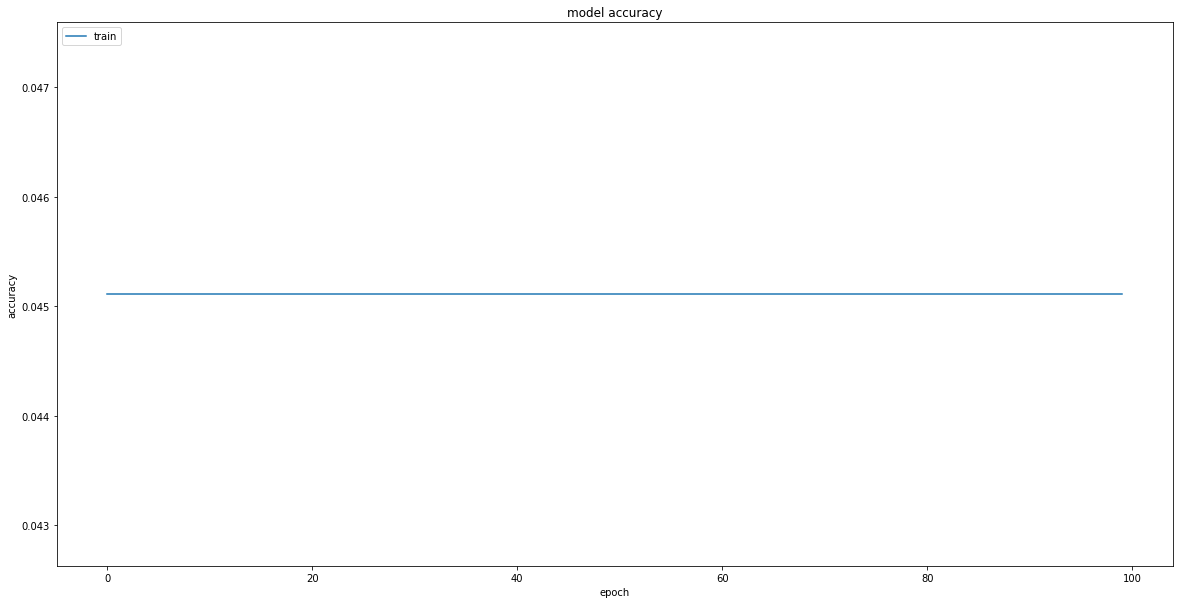

77.77722576856613

In [55]:
csi_df = csi_data()
x_train_csi, y_train_csi, x_res_csi, denom_csi = csi_data4modeling(csi_df, n = 7)
csi_july = csi_model2predict(x_train_csi, y_train_csi, x_res_csi, denom_csi, n = 7)
csi_july

In [56]:
csi_df.loc[0,'201904월']

101.6